In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Tram-Amsterdam

## Generate tram networks

In [4]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 8799.40it/s]


Calculate_degree possibly unhappy


In [5]:
city_tram_routes

,osm_id,route,to,name,ref,network,service,geometry
17,31398,tram,"Amsterdam, De Boelelaan/VU",Tram 24: Amsterdam Centraal Station => Amsterd...,24,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
18,31530,tram,"Amsterdam, Oudenaardeplantsoen",Tram 2: Amsterdam Centraal Station => Amsterda...,2,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.81102 52.34641, 4.81118 52..."
19,31794,tram,"Amsterdam, Drentepark",Tram 4: Amsterdam Centraal Station => Amsterda...,4,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
22,32579,tram,"Amsterdam, Osdorp Dijkgraafsplein",Tram 17: Amsterdam Centraal Station => Amsterd...,17,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89915 52.37828, 4.89919 52..."
23,32615,tram,"Amsterdam, IJburg",Tram 26: Amsterdam Centraal Station => Amsterd...,26,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90035 52.37793, 4.90035 52..."
24,32867,tram,"Amsterdam, Lambertus Zijlplein",Tram 13: Amsterdam Centraal Station => Amsterd...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89922 52.37830, 4.89926 52..."
390,4494870,tram,"Amsterdam, Centraal Station",Tram 4: Amsterdam Station RAI => Amsterdam Cen...,4,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.88956 52.33608, 4.88962 52..."
391,4497721,tram,"Amsterdam, Centraal Station",Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...,2,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80985 52.34614, 4.81032 52..."
392,4512710,tram,Amsterdam Centraal Station,Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80291 52.37726, 4.80320 52..."
393,4513899,tram,"Amsterdam, Centraal Station",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,24,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.86582 52.33525, 4.86638 52..."


In [6]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [7]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [8]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [9]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

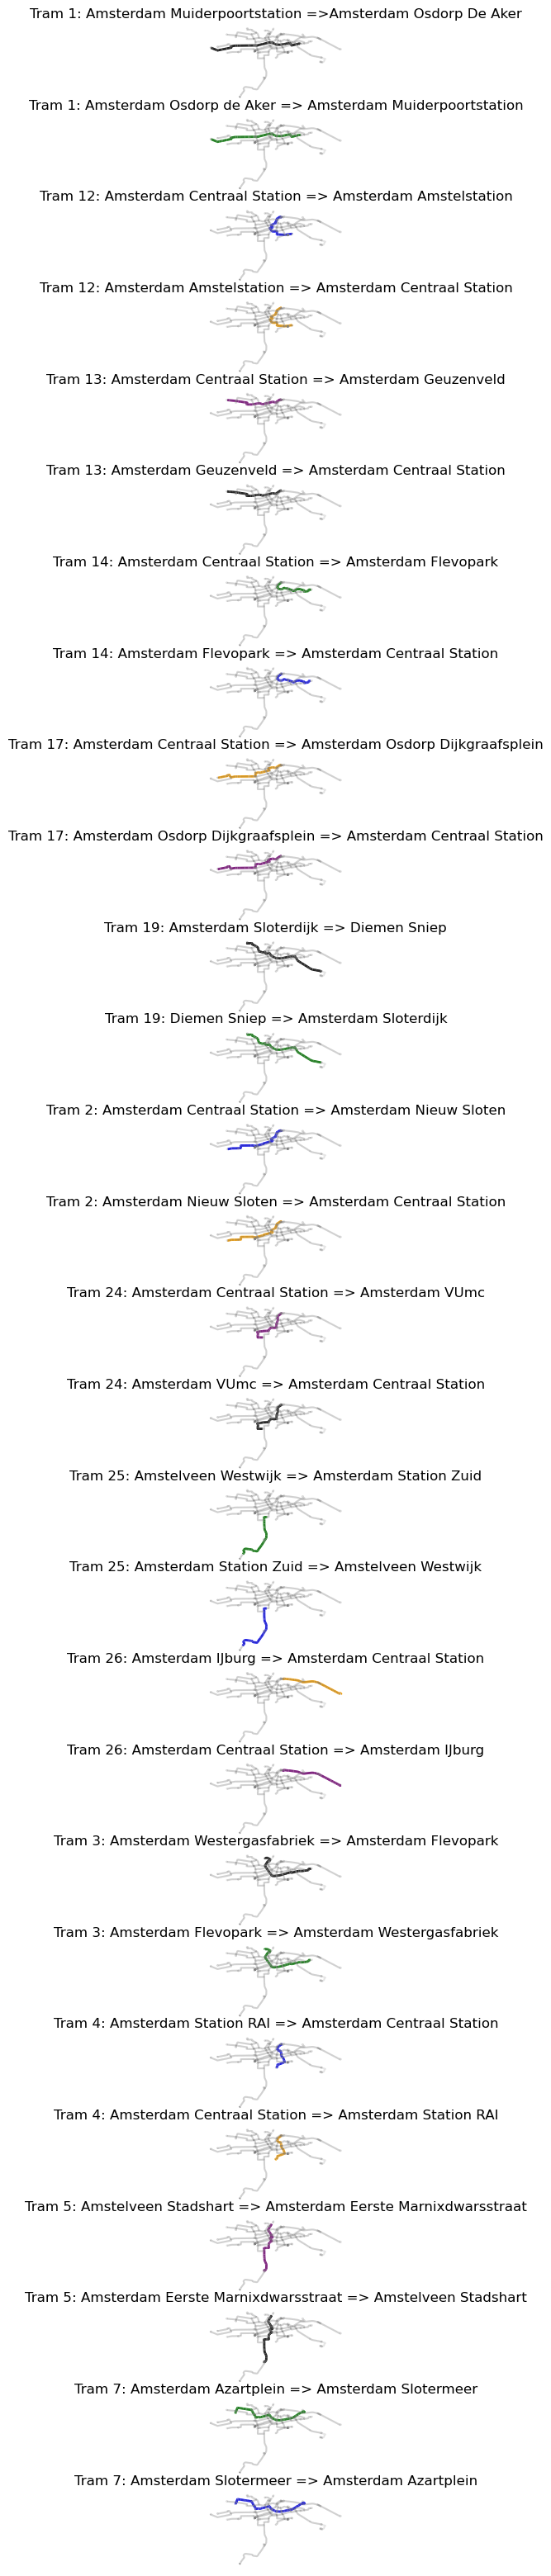

In [10]:
city_tram_order_route_dict, city_tram_shortest_path_pairs, city_tram_shortest_path_edges, tram_edges = tram(city_tram_stations, edges, nodes, city_tram_routes, city='Amsterdam')

## Add columns to nodes

In [11]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [12]:
city_tram_order_route_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name                      geometry  \
 0   42                        Matterhorn  POINT (4.7745043 52.3538687)   
 1    8                           Pilatus   POINT (4.7770976 52.352828)   
 2    9                       Inaristraat  POINT (4.7836582 52.3501979)   
 3   39                          Ecuplein  POINT (4.7881565 52.3496994)   
 4   38                   Baden Powellweg  POINT (4.7944986 52.3509515)   
 5   36                          Hoekenes  POINT (4.8018381 52.3524376)   
 6   41                Louis Davidsstraat  POINT (4.8084929 52.3538423)   
 7   19                     Meer en Vaart    POINT (4.8099119 52.35637)   
 8   40                Johan Huizingalaan  POINT (4.8258953 52.3578123)   
 9   20                  Station Lelylaan  POINT (4.8337835 52.3579004)   
 10  12                 Derkinderenstraat  POINT (4.8397482 52.3579573)   
 11   2                     Surin

In [13]:
city_tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, nodes)

In [14]:
city_tram_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.77450 52.35387),2,847,Matterhorn,4.774504,52.353869,"(4.7745043, 52.3538687)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None
1,POINT (4.77710 52.35283),2,1615,Pilatus,4.777098,52.352828,"(4.7770976, 52.352828)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None
2,POINT (4.78366 52.35020),2,1616,Inaristraat,4.783658,52.350198,"(4.7836582, 52.3501979)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None
3,POINT (4.78816 52.34970),2,1777,Ecuplein,4.788157,52.349699,"(4.7881565, 52.3496994)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None
4,POINT (4.79450 52.35095),2,1776,Baden Powellweg,4.794499,52.350952,"(4.7944986, 52.3509515)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
...,...,...,...,...,...,...,...,...,...,...,...
413,POINT (4.83829 52.37876),2,1659,Burgemeester de Vlugtlaan,4.838294,52.378758,"(4.8382938, 52.3787581)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,POINT (4.83324 52.37955),2,1668,Burgemeester Fockstraat,4.833240,52.379551,"(4.8332396, 52.3795507)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,POINT (4.82750 52.38045),2,1667,Burgemeester Eliasstraat,4.827504,52.380451,"(4.8275036, 52.3804505)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
416,POINT (4.82252 52.38123),2,1663,Plein '40-'45,4.822524,52.381225,"(4.8225241, 52.3812253)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [15]:
city_tram_new_nodes.to_excel('./city_tram_new_nodes8.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [16]:
city_tram_transfer_stations_df = all_transfer_stations_df(city_tram_new_nodes)

In [17]:
city_tram_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
4,POINT (4.79450 52.35095),2,1776,Baden Powellweg,4.794499,52.350952,"(4.7944986, 52.3509515)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
5,POINT (4.80184 52.35244),2,1686,Hoekenes,4.801838,52.352438,"(4.8018381, 52.3524376)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
7,POINT (4.80991 52.35637),2,1784,Meer en Vaart,4.809912,52.356370,"(4.8099119, 52.35637)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
8,POINT (4.82590 52.35781),2,1780,Johan Huizingalaan,4.825895,52.357812,"(4.8258953, 52.3578123)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17, 2","1, 17, 2"
9,POINT (4.83378 52.35790),2,1786,Station Lelylaan,4.833784,52.357900,"(4.8337835, 52.3579004)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
...,...,...,...,...,...,...,...,...,...,...,...
399,POINT (4.93440 52.37292),2,1810,Rietlandpark,4.934405,52.372921,"(4.9344045, 52.372921)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"26, 7","26, 7"
404,POINT (4.93483 52.37301),2,1515,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
408,POINT (4.91857 52.36337),2,1803,Alexanderplein,4.918568,52.363371,"(4.9185684, 52.3633708)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"14, 19, 7","14, 19, 7"
410,POINT (4.85007 52.37041),2,1888,Mercatorplein,4.850068,52.370406,"(4.8500681, 52.3704058)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"13, 7","13, 7"


In [18]:
len(city_tram_transfer_stations_df)

183

In [19]:
city_tram_transfer_stations_df.to_excel('./city_tram_transfer_stations_df8.xlsx',header = True, index = False)

## Add columns to edges

In [20]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges, city_tram_routes)

In [21]:
city_tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':        osm_id                                           geometry railway  \
 0   322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
 1   322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
 2    26594761  LINESTRING (4.785218 52.3495798, 4.7849725 52....    tram   
 3   322841907  LINESTRING (4.7881565 52.3496994, 4.7880725 52...    tram   
 4   322841927  LINESTRING (4.7849725 52.3496771, 4.7836582 52...    tram   
 ..        ...                                                ...     ...   
 91  770438581  LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram   
 92    7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
 93  770429442  LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram   
 94  770429442  LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram   
 95  770438581  LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram   
 
    ser

In [22]:
city_tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges,edges)

In [23]:
city_tram_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)",NaN,NaN,NaN,NaN
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)",NaN,NaN,NaN,NaN
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)",NaN,NaN,NaN,NaN
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)",NaN,NaN,NaN,NaN


## Test 8: Amsterdam 8 -- s-transfer, e-no transfer, s_e has no same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [24]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.799689101728929,
    's_coordinates_y': 52.35827341252233, 
    'e_coordinates_x': 4.919379892838444, 
    'e_coordinates_y': 52.36376762975406
} 

In [25]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [26]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
173,POINT (4.79957 52.35807),2,1826,Hoekenes,4.799566,52.358071,"(4.7995659, 52.3580714)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"1, 17","1, 17"


In [27]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
395,POINT (4.91924 52.36387),2,1597,Alexanderplein,4.919237,52.363873,"(4.9192366, 52.3638735)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"14, 19, 7","14, 19, 7"


In [28]:
end_node.iloc[0,9]

'14, 19, 7'

### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [29]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

In [30]:
s_on_route_ref

,ref
0,1
1,17


In [31]:
e_on_route_ref

,ref
0,14
1,19
2,7


### Make judgement of s_e_on_route_ref

In [32]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Any of e_on_route is not the same as any of s_on_route 

The next step is to find transfer stations of e_on_route and s_on_route----using function 'transfer_station_btw'


In [33]:
e_on_route_ref

,ref
0,14
1,19
2,7


### Find those same routes

In [34]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on totally different routes

The next step is to find transfer station of s_on_route:['1', '17'] and e_on_route:['14', '19', '7']


,ref


### Find transfer stations

In [35]:
city_tram_routes

,osm_id,route,to,name,ref,network,service,geometry
0,8507592,tram,Matterhorn,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,1,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93261 52.36080, 4.93252 52..."
1,8500553,tram,Muiderpoortstation,Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,1,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.77476 52.35373, 4.77655 52..."
2,8510079,tram,Amstelstation,Tram 12: Amsterdam Centraal Station => Amsterd...,12,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89929 52.37832, 4.89936 52..."
3,8507941,tram,Centraal Station,Tram 12: Amsterdam Amstelstation => Amsterdam ...,12,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.91789 52.34745, 4.91800 52..."
4,32867,tram,Lambertus Zijlplein,Tram 13: Amsterdam Centraal Station => Amsterd...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89922 52.37830, 4.89926 52..."
5,4512710,tram,Centraal Station,Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80291 52.37726, 4.80320 52..."
6,8507786,tram,Flevopark,Tram 14: Amsterdam Centraal Station => Amsterd...,14,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
7,8507736,tram,Centraal Station,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,14,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.95186 52.36530, 4.95171 52..."
8,32579,tram,Dijkgraafplein,Tram 17: Amsterdam Centraal Station => Amsterd...,17,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89915 52.37828, 4.89919 52..."
9,4514441,tram,Centraal Station,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.78649 52.35545, 4.78658 52..."


In [36]:
city_tram_routes.to_excel('./city_tram_routes8.xlsx',header = True, index = False)

In [37]:
city_tram_routes_gdf = gpd.GeoDataFrame(city_tram_routes.copy())

In [38]:
city_tram_routes_gdf.to_excel('./city_tram_routes_gdf8.xlsx',header = True, index = False)

In [39]:
s_node_gdf = gpd.GeoDataFrame(start_node.copy())
e_node_gdf = gpd.GeoDataFrame(end_node.copy())

In [40]:
s_node_on_route_gdf = city_tram_routes_gdf[city_tram_routes_gdf.geometry.intersects(s_node_gdf.iloc[0].geometry)]
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
9,4514441,tram,Centraal Station,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.78649 52.35545, 4.78658 52..."


In [41]:
len(s_node_on_route_gdf)

1

In [42]:
e_node_on_route_gdf = city_tram_routes_gdf[city_tram_routes_gdf.geometry.intersects(e_node_gdf.iloc[0].geometry)]

In [43]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
26,8487480,tram,Sloterpark,Tram 7: Amsterdam Azartplein => Amsterdam Slot...,7,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93732 52.37661, 4.93733 52..."


In [44]:
len(e_node_on_route_gdf)

1

In [45]:
s_node_on_route_gdf.iloc[0,4]

'17'

In [46]:
t_station_ref = [s_node_on_route_gdf.iloc[0,4]+', '+e_node_on_route_gdf.iloc[0,4],e_node_on_route_gdf.iloc[0,4]+', '+s_node_on_route_gdf.iloc[0,4]]
t_station_ref

['17, 7', '7, 17']

In [47]:
all_nodes_ref = city_tram_new_nodes.ref.to_list()
all_nodes_ref

['1',
 '1',
 '1',
 '1',
 '1, 17',
 '1, 17',
 '1',
 '1, 17',
 '1, 17, 2',
 '1, 17',
 '1, 17',
 '1, 17',
 '1',
 '1',
 '1',
 '1, 12, 19, 2, 5, 7',
 '1, 19, 7',
 '1, 19, 24, 7',
 '1, 19, 4, 7',
 '1, 19, 7',
 '1, 19, 7',
 '1, 3',
 '1, 3',
 '1, 3',
 '1, 3',
 '1, 3',
 '1, 3',
 '1, 3',
 '1, 3',
 '1, 19, 7',
 '1, 19, 7',
 '1, 19, 4, 7',
 '1, 19, 24, 7',
 '1, 19, 7',
 '1, 12, 19, 2, 5, 7',
 '1',
 '1',
 '1',
 '1, 17',
 '1, 17',
 '1, 17',
 '1, 17, 2',
 '1, 17',
 '1',
 '1, 17',
 '1, 17',
 '1',
 '1',
 '1',
 '1',
 '12',
 '12',
 '12, 4',
 '12, 4',
 '12, 4',
 '12',
 '12',
 '12, 24, 3',
 '12, 24, 3, 5',
 '12, 3, 5',
 '12, 2, 5',
 '12, 2, 4',
 '12, 2, 4',
 '12, 2',
 '12, 2',
 '12, 13, 14, 17, 2, 24, 4',
 '12, 13, 17, 2',
 '12, 13, 14, 17, 2, 24, 26, 4',
 '12, 13, 14, 17, 2, 24, 26, 4',
 '12, 13, 17, 2',
 '12, 2',
 '12, 2',
 '12, 2, 4',
 '12, 2, 4',
 '1, 12, 19, 2, 5, 7',
 '12, 2, 5',
 '12, 3, 5',
 '12, 24, 3, 5',
 '12, 24, 3',
 '12',
 '12',
 '12, 4',
 '12, 4',
 '12, 4',
 '12',
 '13',
 '13',
 '13',
 '13',

In [48]:
# 存储匹配位置的列表
positions = []

# 判断每个元素是否在all_nodes_ref中，并记录位置
for element in t_station_ref:
    for i, item in enumerate(all_nodes_ref):
        if element == item:
            positions.append(i)

print("匹配位置：", positions)

匹配位置： [157, 158, 159, 167, 168, 169, 394]


In [49]:
t_stations_gdf = city_tram_new_nodes.iloc[positions]
t_stations_gdf

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
157,POINT (4.85315 52.36386),2,1828,Postjesweg,4.853149,52.363856,"(4.8531487, 52.3638557)",Tram 17: Amsterdam Centraal Station => Amsterd...,tram,"17, 7","17, 7"
158,POINT (4.85861 52.36479),2,1801,Witte de Withstraat,4.858610,52.364787,"(4.8586095, 52.3647872)",Tram 17: Amsterdam Centraal Station => Amsterd...,tram,"17, 7","17, 7"
159,POINT (4.86569 52.36554),2,1626,Nicolaas Beetsstraat,4.865689,52.365543,"(4.8656891, 52.3655426)",Tram 17: Amsterdam Centraal Station => Amsterd...,tram,"17, 7","17, 7"
167,POINT (4.86547 52.36546),2,1625,Nicolaas Beetsstraat,4.865473,52.365462,"(4.8654725, 52.3654615)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 7","17, 7"
168,POINT (4.85918 52.36480),2,1624,Witte de Withstraat,4.859180,52.364802,"(4.8591799, 52.3648019)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 7","17, 7"
169,POINT (4.85398 52.36425),2,1892,Hoofdweg,4.853975,52.364248,"(4.853975, 52.3642479)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 7","17, 7"
394,POINT (4.85318 52.36477),2,1534,Postjesweg,4.853179,52.364773,"(4.8531786, 52.3647729)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"17, 7","17, 7"


In [50]:
type(city_tram_new_nodes)

geopandas.geodataframe.GeoDataFrame

In [51]:
t_stations_gdf.to_excel('./t_stations_df8.xlsx',header = True, index = False)

In [52]:
t_stations_gdf['route_name_list'] == s_node_on_route_gdf.iloc[0,3]

157    False
158    False
159    False
167     True
168     True
169     True
394    False
Name: route_name_list, dtype: bool

In [53]:
condition = (t_stations_gdf['name'].duplicated(keep=False)) & (t_stations_gdf['route_name_list'] == s_node_on_route_gdf.iloc[0,3])
condition

157    False
158    False
159    False
167     True
168     True
169    False
394    False
dtype: bool

In [54]:
result_gdf = t_stations_gdf[condition]
result_gdf

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
167,POINT (4.86547 52.36546),2,1625,Nicolaas Beetsstraat,4.865473,52.365462,"(4.8654725, 52.3654615)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 7","17, 7"
168,POINT (4.85918 52.36480),2,1624,Witte de Withstraat,4.859180,52.364802,"(4.8591799, 52.3648019)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 7","17, 7"


In [55]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
173,POINT (4.79957 52.35807),2,1826,Hoekenes,4.799566,52.358071,"(4.7995659, 52.3580714)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"1, 17","1, 17"


In [56]:
all_stations_on_s_route = all_stations_on_matched_route(city_tram_order_route_dict, s_node_on_route_gdf)
all_stations_on_s_route

{'Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station':     id                  name                      geometry     geo_x  \
 0   41      Centraal Station  POINT (4.8987647 52.3785952)  4.898765   
 1   10      Nieuwezijds Kolk  POINT (4.8934715 52.3761313)  4.893472   
 2    9           Westermarkt  POINT (4.8843359 52.3740143)  4.884336   
 3    8          Elandsgracht  POINT (4.8775579 52.3695272)  4.877558   
 4   12           Rozengracht   POINT (4.875944 52.3718196)  4.875944   
 5    7      Bilderdijkstraat  POINT (4.8717631 52.3671254)  4.871763   
 6    6  Nicolaas Beetsstraat  POINT (4.8654725 52.3654615)  4.865473   
 7    5   Witte de Withstraat  POINT (4.8591799 52.3648019)   4.85918   
 8   19              Hoofdweg   POINT (4.853975 52.3642479)  4.853975   
 9    4       Corantijnstraat  POINT (4.8532957 52.3617312)  4.853296   
 10   0         Surinameplein  POINT (4.8521827 52.3580481)  4.852183   
 11   1     Derkinderenstraat  POINT (4.8401257 5

In [57]:
list(all_stations_on_s_route.keys())

['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

In [58]:
list(all_stations_on_s_route.keys())[0]

'Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station'

In [59]:
all_stations_on_s_route_df = all_stations_on_s_route[list(all_stations_on_s_route.keys())[0]]
all_stations_on_s_route_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value
0,41,Centraal Station,POINT (4.8987647 52.3785952),4.898765,52.378595,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8987647, 52.3785952)"
1,10,Nieuwezijds Kolk,POINT (4.8934715 52.3761313),4.893472,52.376131,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8934715, 52.3761313)"
2,9,Westermarkt,POINT (4.8843359 52.3740143),4.884336,52.374014,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8843359, 52.3740143)"
3,8,Elandsgracht,POINT (4.8775579 52.3695272),4.877558,52.369527,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8775579, 52.3695272)"
4,12,Rozengracht,POINT (4.875944 52.3718196),4.875944,52.37182,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.875944, 52.3718196)"
5,7,Bilderdijkstraat,POINT (4.8717631 52.3671254),4.871763,52.367125,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8717631, 52.3671254)"
6,6,Nicolaas Beetsstraat,POINT (4.8654725 52.3654615),4.865473,52.365462,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8654725, 52.3654615)"
7,5,Witte de Withstraat,POINT (4.8591799 52.3648019),4.85918,52.364802,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8591799, 52.3648019)"
8,19,Hoofdweg,POINT (4.853975 52.3642479),4.853975,52.364248,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.853975, 52.3642479)"
9,4,Corantijnstraat,POINT (4.8532957 52.3617312),4.853296,52.361731,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8532957, 52.3617312)"


In [97]:
start_node.iloc[0,3]

'Hoekenes'

In [102]:
start_node_index_on_s_route = all_stations_on_s_route_df[all_stations_on_s_route_df['name'] == start_node.iloc[0,3]]

In [106]:
start_node_index_on_s_route.index.tolist()[0]

17

In [60]:
type(all_stations_on_s_route_df)

pandas.core.frame.DataFrame

In [61]:
type(start_node)

geopandas.geodataframe.GeoDataFrame

In [62]:
result_df = pd.DataFrame(result_gdf.copy())
start_node_df = pd.DataFrame(start_node.copy())

merged_df = pd.concat([result_df,start_node_df]).reset_index(drop=True)
merged_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.86547 52.36546),2,1625,Nicolaas Beetsstraat,4.865473,52.365462,"(4.8654725, 52.3654615)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 7","17, 7"
1,POINT (4.85918 52.36480),2,1624,Witte de Withstraat,4.859180,52.364802,"(4.8591799, 52.3648019)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 7","17, 7"
2,POINT (4.79957 52.35807),2,1826,Hoekenes,4.799566,52.358071,"(4.7995659, 52.3580714)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"1, 17","1, 17"


In [63]:
merged_df['name']

0    Nicolaas Beetsstraat
1     Witte de Withstraat
2                Hoekenes
Name: name, dtype: object

In [64]:
all_stations_on_s_route_df['index'] = all_stations_on_s_route_df.index 
selected_columns = all_stations_on_s_route_df[['index','name']]

In [65]:
condition_df = pd.merge(selected_columns,merged_df['name'],on='name',how='right')
condition_df

,index,name
0,6,Nicolaas Beetsstraat
1,7,Witte de Withstraat
2,17,Hoekenes


In [66]:
condition_df = pd.merge(all_stations_on_s_route_df,merged_df['name'],on='name',how='right')
condition_df

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value,index
0,6,Nicolaas Beetsstraat,POINT (4.8654725 52.3654615),4.865473,52.365462,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8654725, 52.3654615)",6
1,5,Witte de Withstraat,POINT (4.8591799 52.3648019),4.85918,52.364802,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.8591799, 52.3648019)",7
2,15,Hoekenes,POINT (4.7995659 52.3580714),4.799566,52.358071,Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,17,tram,"(4.7995659, 52.3580714)",17


In [67]:
start_node_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
173,POINT (4.79957 52.35807),2,1826,Hoekenes,4.799566,52.358071,"(4.7995659, 52.3580714)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"1, 17","1, 17"


In [68]:
condition_df.loc[2,'name']

'Hoekenes'

In [74]:
start_node_df.iloc[0,3]

'Hoekenes'

In [77]:
start_node_df.iloc[0,3]==condition_df.loc[2,'name']

True

In [ ]:
target_index = condition_df[condition_df.name == start_node.name

### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                          name                      geometry     geo_x  \
 0   23           Lambertus Zijlplein  POINT (4.8032895 52.3772583)  4.803289   
 1   14           Dr. H. Colijnstraat  POINT (4.8065746 52.3769374)  4.806575   
 2   13  Burgemeester Van Leeuwenlaan  POINT (4.8117554 52.3765095)  4.811755   
 3    5                Slotermeerlaan  POINT (4.8173607 52.3759547)  4.817361   
 4    6    Burgemeester Rendorpstraat  POINT (4.8277027 52.3743645)  4.827703   
 5   17           Jan van Galenstraat  POINT (4.8350051 52.3732337)  4.835005   
 6   15              Jan Tooropstraat   POINT (4.838103 52.3714267)  4.838103   
 7   16             Jan Voermanstraat  POINT (4.8378389 52.3697121)  4.837839   
 8   12       Admiraal Helfrichstraat  POINT (4.8438216 52.3694429)  4.843822   
 9    7                 Mercatorplein  POINT (4.8507957 52.3701459)  4.850796   
 10   8              Marco Polostraat  POINT (4.8554942 52.3709604)  4.855494   
 11   1        Admiraal De R

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                          name                      geometry     geo_x  \
 18  18              Centraal Station   POINT (4.8992178 52.378303)  4.899218   
 17  11              Nieuwezijds Kolk  POINT (4.8930014 52.3758615)  4.893001   
 16   3                           Dam   POINT (4.8908314 52.373751)  4.890831   
 15  10                   Westermarkt  POINT (4.8837739 52.3740565)  4.883774   
 14   9                  Marnixstraat  POINT (4.8763385 52.3723364)  4.876339   
 13   0              Bilderdijkstraat  POINT (4.8708148 52.3710541)  4.870815   
 12   2         Willem de Zwijgerlaan  POINT (4.8636349 52.3706925)  4.863635   
 11   1        Admiraal De Ruijterweg   POINT (4.8600128 52.371502)  4.860013   
 10   8              Marco Polostraat  POINT (4.8554942 52.3709604)  4.855494   
 9    7                 Mercatorplein  POINT (4.8507957 52.3701459)  4.850796   
 8   12       Admiraal Helfrichstraat  POINT (4.8438216 52.3694429)  4.843822   
 7   16             Jan Voer

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1613  1682
 1   1682  1816
 2   1816  1815
 3   1815  1633
 4   1633  1634
 5   1634  1819
 6   1819  1817
 7   1817  1818
 8   1818  1814
 9   1814  1639
 10  1639  1640
 11  1640  1594
 12  1594  1595
 13  1595  1553
 14  1553  1662
 15  1662  1671
 16  1671  1305]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1613  1682
 1   1682  1816
 2   1816  1815
 3   1815  1633
 4   1633  1634
 5   1634  1819
 6   1819  1817
 7   1817  1818
 8   1818  1814
 9   1814  1639
 10  1639  1640
 11  1640  1594
 12  1594  1595
 13  1595  1553
 14  1553  1662
 15  1662  1671
 16  1671  1305]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
1724,730313405,"LINESTRING (4.8930014 52.3758615, 4.8927887 52...",tram,None,1724,1682,1461,93.659093,0.006690,93,"(1682, 1461)","(1461, 1682)"
1725,730313405,"LINESTRING (4.8920868 52.3752328, 4.8919834 52...",tram,None,1725,1461,1462,110.042874,0.007860,110,"(1461, 1462)","(1462, 1461)"
1726,730313405,"LINESTRING (4.89128 52.3743785, 4.8912389 52.3...",tram,None,1726,1462,1613,76.496556,0.005464,76,"(1462, 1613)","(1613, 1462)"
2158,1172020662,"LINESTRING (4.8920868 52.3752328, 4.8920061 52...",tram,None,2158,1461,1462,109.928912,0.007852,109,"(1461, 1462)","(1462, 1461)"
50,7373033,"LINESTRING (4.890643 52.3733417, 4.8906134 52....",tram,None,50,69,70,117.895192,0.008421,117,"(69, 70)","(70, 69)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1728,730325005,"LINESTRING (4.8887025 52.3732782, 4.888576 52....",tram,None,1728,160,1174,95.956568,0.006854,95,"(160, 1174)","(1174, 160)"
1942,785924870,"LINESTRING (4.8929676 52.373268, 4.8925499 52....",tram,None,1942,703,1644,117.635051,0.008403,117,"(703, 1644)","(1644, 703)"
1943,785924870,"LINESTRING (4.8913489 52.3735587, 4.8912162 52...",tram,None,1943,1644,704,9.040371,0.000646,9,"(1644, 704)","(704, 1644)"
2075,843454008,"LINESTRING (4.8990454 52.3778768, 4.8987312 52...",tram,None,2075,1436,1283,33.360991,0.002383,33,"(1436, 1283)","(1283, 1436)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,730313405,"LINESTRING (4.8930014 52.3758615, 4.8927887 52...",tram,None,1724,1682,1461,93.659093,0.006690,93,"(1682, 1461)","(1461, 1682)",2.0
1,730313405,"LINESTRING (4.8920868 52.3752328, 4.8919834 52...",tram,None,1725,1461,1462,110.042874,0.007860,110,"(1461, 1462)","(1462, 1461)",2.0
2,730313405,"LINESTRING (4.89128 52.3743785, 4.8912389 52.3...",tram,None,1726,1462,1613,76.496556,0.005464,76,"(1462, 1613)","(1613, 1462)",2.0
3,1172020662,"LINESTRING (4.8920868 52.3752328, 4.8920061 52...",tram,None,2158,1461,1462,109.928912,0.007852,109,"(1461, 1462)","(1462, 1461)",2.0
4,7373033,"LINESTRING (4.890643 52.3733417, 4.8906134 52....",tram,None,50,69,70,117.895192,0.008421,117,"(69, 70)","(70, 69)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,730325005,"LINESTRING (4.8887025 52.3732782, 4.888576 52....",tram,None,1728,160,1174,95.956568,0.006854,95,"(160, 1174)","(1174, 160)",2.0
144,785924870,"LINESTRING (4.8929676 52.373268, 4.8925499 52....",tram,None,1942,703,1644,117.635051,0.008403,117,"(703, 1644)","(1644, 703)",1.0
145,785924870,"LINESTRING (4.8913489 52.3735587, 4.8912162 52...",tram,None,1943,1644,704,9.040371,0.000646,9,"(1644, 704)","(704, 1644)",1.0
146,843454008,"LINESTRING (4.8990454 52.3778768, 4.8987312 52...",tram,None,2075,1436,1283,33.360991,0.002383,33,"(1436, 1283)","(1283, 1436)",1.0


In [39]:
shortest_path_edges_way.time.sum()

1.034523899520332

<Axes: >

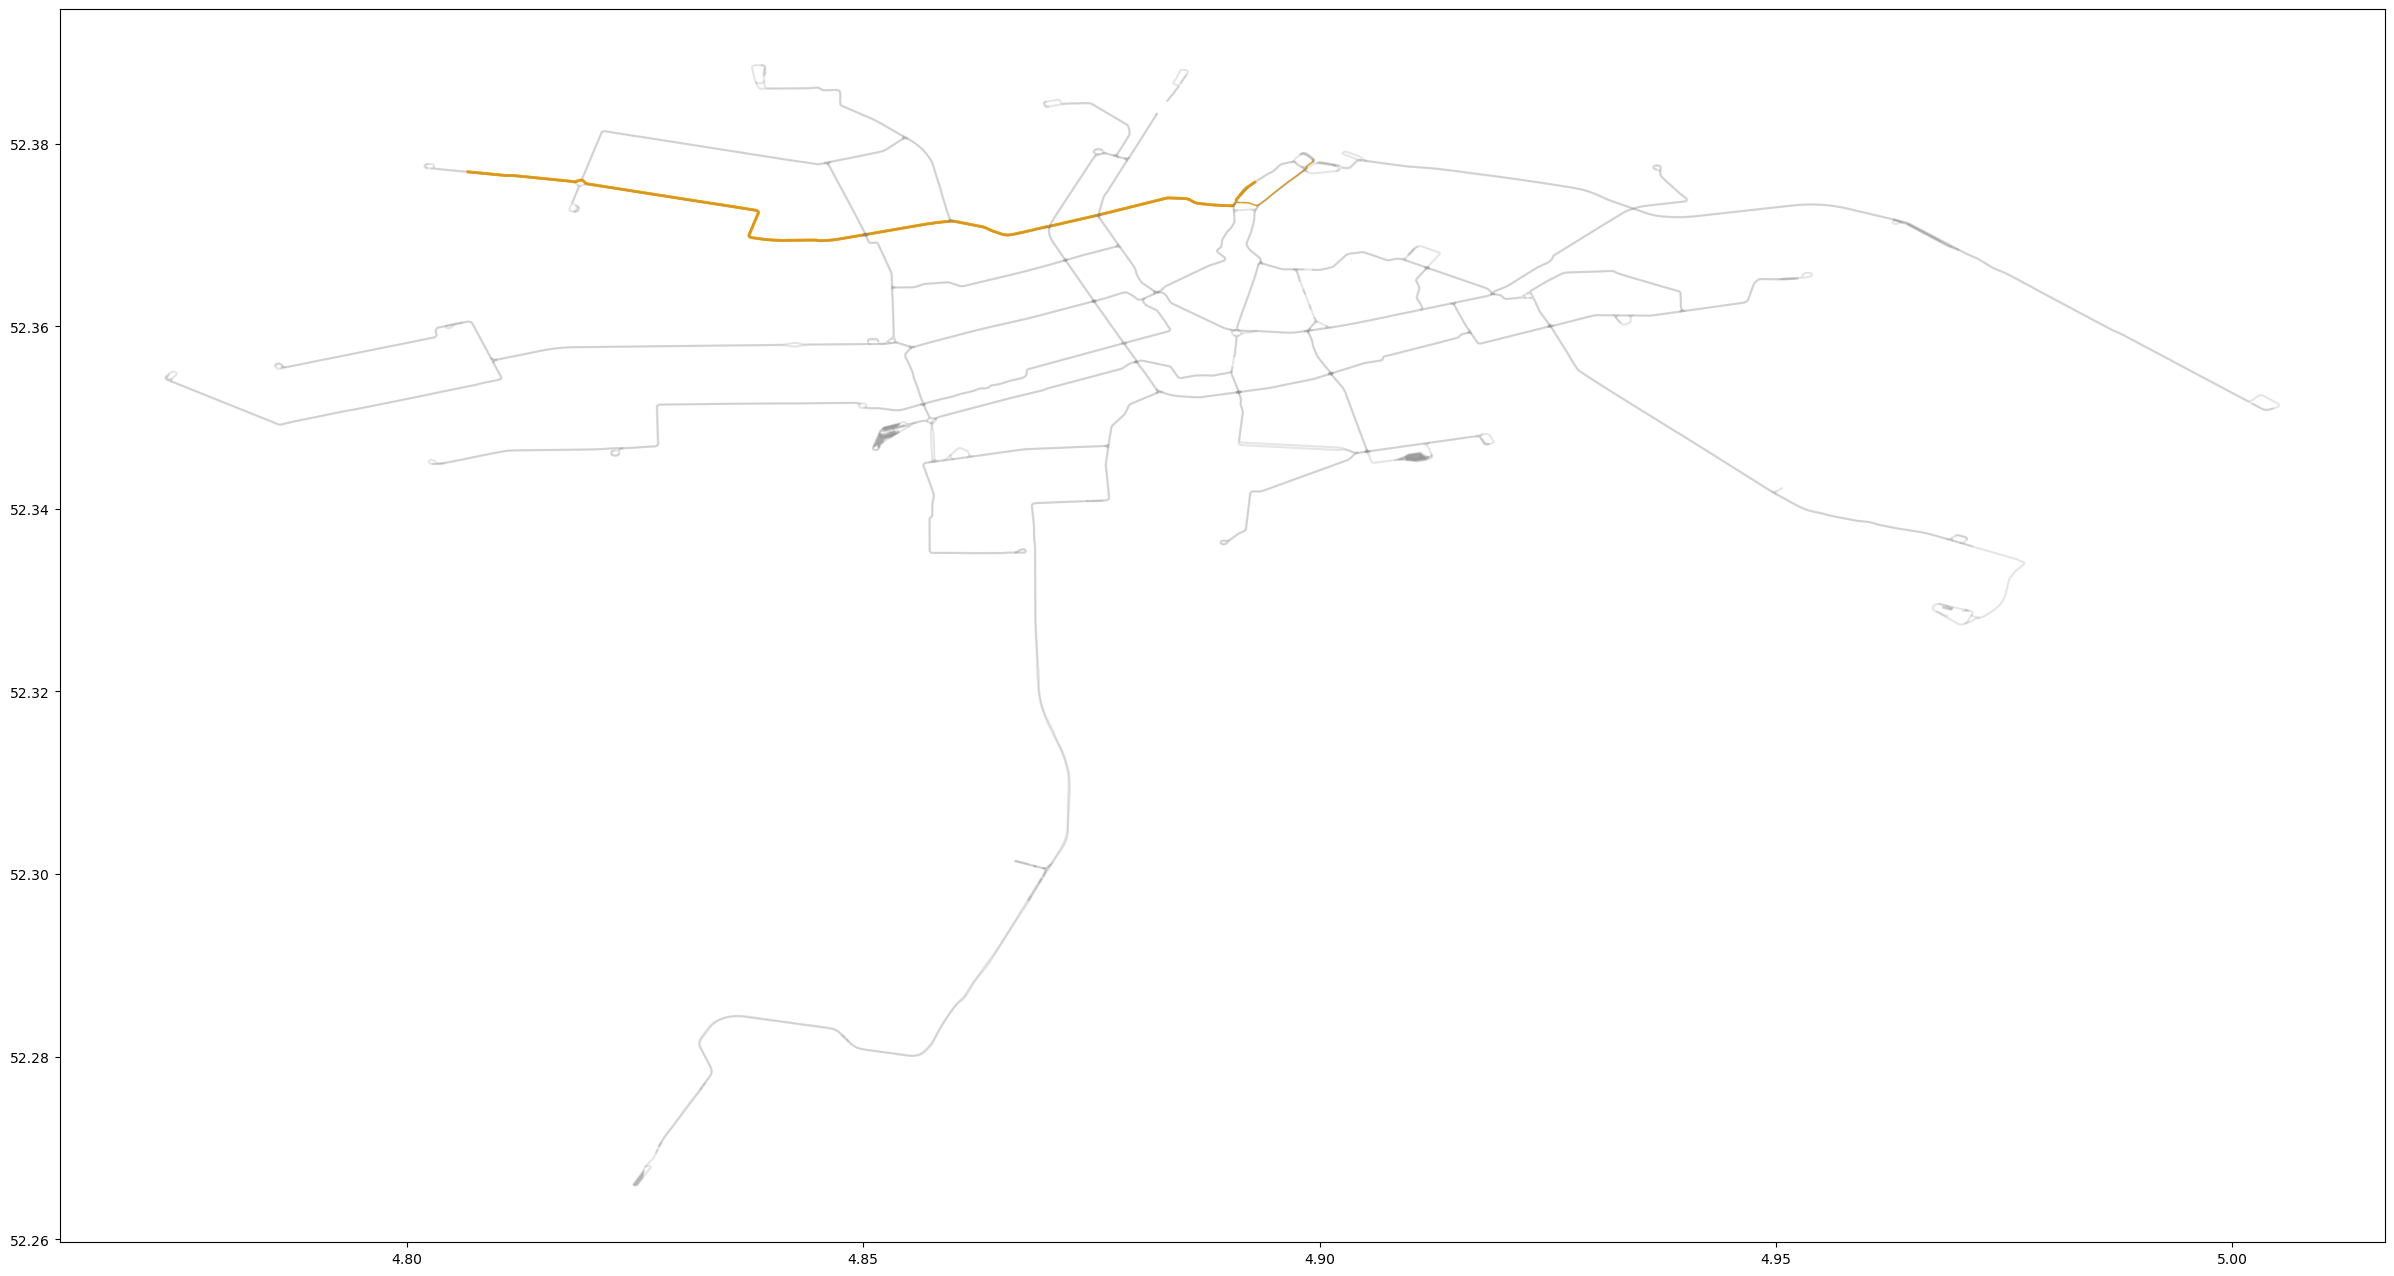

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 7: Amsterdam 7 -- s-transfer, e-no transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.898851078232505,
    's_coordinates_y': 52.37824700176021, 
    'e_coordinates_x': 4.80767869386144, 
    'e_coordinates_y': 52.37723172156935
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
162,POINT (4.89915 52.37828),2,1312,Centraal Station,4.899155,52.378281,"(4.8991546, 52.3782813)",Tram 17: Amsterdam Centraal Station => Amsterd...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
86,POINT (4.80657 52.37694),2,1816,Dr. H. Colijnstraat,4.806575,52.376937,"(4.8065746, 52.3769374)",Tram 13: Amsterdam Centraal Station => Amsterd...,tram,13,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
1  13



,ref
1,13


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                          name                      geometry     geo_x  \
 0   23           Lambertus Zijlplein  POINT (4.8032895 52.3772583)  4.803289   
 1   14           Dr. H. Colijnstraat  POINT (4.8065746 52.3769374)  4.806575   
 2   13  Burgemeester Van Leeuwenlaan  POINT (4.8117554 52.3765095)  4.811755   
 3    5                Slotermeerlaan  POINT (4.8173607 52.3759547)  4.817361   
 4    6    Burgemeester Rendorpstraat  POINT (4.8277027 52.3743645)  4.827703   
 5   17           Jan van Galenstraat  POINT (4.8350051 52.3732337)  4.835005   
 6   15              Jan Tooropstraat   POINT (4.838103 52.3714267)  4.838103   
 7   16             Jan Voermanstraat  POINT (4.8378389 52.3697121)  4.837839   
 8   12       Admiraal Helfrichstraat  POINT (4.8438216 52.3694429)  4.843822   
 9    7                 Mercatorplein  POINT (4.8507957 52.3701459)  4.850796   
 10   8              Marco Polostraat  POINT (4.8554942 52.3709604)  4.855494   
 11   1        Admiraal De R

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                          name                      geometry     geo_x  \
 18  18              Centraal Station   POINT (4.8992178 52.378303)  4.899218   
 17  11              Nieuwezijds Kolk  POINT (4.8930014 52.3758615)  4.893001   
 16   3                           Dam   POINT (4.8908314 52.373751)  4.890831   
 15  10                   Westermarkt  POINT (4.8837739 52.3740565)  4.883774   
 14   9                  Marnixstraat  POINT (4.8763385 52.3723364)  4.876339   
 13   0              Bilderdijkstraat  POINT (4.8708148 52.3710541)  4.870815   
 12   2         Willem de Zwijgerlaan  POINT (4.8636349 52.3706925)  4.863635   
 11   1        Admiraal De Ruijterweg   POINT (4.8600128 52.371502)  4.860013   
 10   8              Marco Polostraat  POINT (4.8554942 52.3709604)  4.855494   
 9    7                 Mercatorplein  POINT (4.8507957 52.3701459)  4.850796   
 8   12       Admiraal Helfrichstraat  POINT (4.8438216 52.3694429)  4.843822   
 7   16             Jan Voer

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1613  1682
 1   1682  1816
 2   1816  1815
 3   1815  1633
 4   1633  1634
 5   1634  1819
 6   1819  1817
 7   1817  1818
 8   1818  1814
 9   1814  1639
 10  1639  1640
 11  1640  1594
 12  1594  1595
 13  1595  1553
 14  1553  1662
 15  1662  1671
 16  1671  1305]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1613  1682
 1   1682  1816
 2   1816  1815
 3   1815  1633
 4   1633  1634
 5   1634  1819
 6   1819  1817
 7   1817  1818
 8   1818  1814
 9   1814  1639
 10  1639  1640
 11  1640  1594
 12  1594  1595
 13  1595  1553
 14  1553  1662
 15  1662  1671
 16  1671  1305]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
1724,730313405,"LINESTRING (4.8930014 52.3758615, 4.8927887 52...",tram,None,1724,1682,1461,93.659093,0.006690,93,"(1682, 1461)","(1461, 1682)"
1725,730313405,"LINESTRING (4.8920868 52.3752328, 4.8919834 52...",tram,None,1725,1461,1462,110.042874,0.007860,110,"(1461, 1462)","(1462, 1461)"
1726,730313405,"LINESTRING (4.89128 52.3743785, 4.8912389 52.3...",tram,None,1726,1462,1613,76.496556,0.005464,76,"(1462, 1613)","(1613, 1462)"
2158,1172020662,"LINESTRING (4.8920868 52.3752328, 4.8920061 52...",tram,None,2158,1461,1462,109.928912,0.007852,109,"(1461, 1462)","(1462, 1461)"
50,7373033,"LINESTRING (4.890643 52.3733417, 4.8906134 52....",tram,None,50,69,70,117.895192,0.008421,117,"(69, 70)","(70, 69)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1728,730325005,"LINESTRING (4.8887025 52.3732782, 4.888576 52....",tram,None,1728,160,1174,95.956568,0.006854,95,"(160, 1174)","(1174, 160)"
1942,785924870,"LINESTRING (4.8929676 52.373268, 4.8925499 52....",tram,None,1942,703,1644,117.635051,0.008403,117,"(703, 1644)","(1644, 703)"
1943,785924870,"LINESTRING (4.8913489 52.3735587, 4.8912162 52...",tram,None,1943,1644,704,9.040371,0.000646,9,"(1644, 704)","(704, 1644)"
2075,843454008,"LINESTRING (4.8990454 52.3778768, 4.8987312 52...",tram,None,2075,1436,1283,33.360991,0.002383,33,"(1436, 1283)","(1283, 1436)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,730313405,"LINESTRING (4.8930014 52.3758615, 4.8927887 52...",tram,None,1724,1682,1461,93.659093,0.006690,93,"(1682, 1461)","(1461, 1682)",2.0
1,730313405,"LINESTRING (4.8920868 52.3752328, 4.8919834 52...",tram,None,1725,1461,1462,110.042874,0.007860,110,"(1461, 1462)","(1462, 1461)",2.0
2,730313405,"LINESTRING (4.89128 52.3743785, 4.8912389 52.3...",tram,None,1726,1462,1613,76.496556,0.005464,76,"(1462, 1613)","(1613, 1462)",2.0
3,1172020662,"LINESTRING (4.8920868 52.3752328, 4.8920061 52...",tram,None,2158,1461,1462,109.928912,0.007852,109,"(1461, 1462)","(1462, 1461)",2.0
4,7373033,"LINESTRING (4.890643 52.3733417, 4.8906134 52....",tram,None,50,69,70,117.895192,0.008421,117,"(69, 70)","(70, 69)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,730325005,"LINESTRING (4.8887025 52.3732782, 4.888576 52....",tram,None,1728,160,1174,95.956568,0.006854,95,"(160, 1174)","(1174, 160)",2.0
144,785924870,"LINESTRING (4.8929676 52.373268, 4.8925499 52....",tram,None,1942,703,1644,117.635051,0.008403,117,"(703, 1644)","(1644, 703)",1.0
145,785924870,"LINESTRING (4.8913489 52.3735587, 4.8912162 52...",tram,None,1943,1644,704,9.040371,0.000646,9,"(1644, 704)","(704, 1644)",1.0
146,843454008,"LINESTRING (4.8990454 52.3778768, 4.8987312 52...",tram,None,2075,1436,1283,33.360991,0.002383,33,"(1436, 1283)","(1283, 1436)",1.0


In [39]:
shortest_path_edges_way.time.sum()

1.034523899520332

<Axes: >

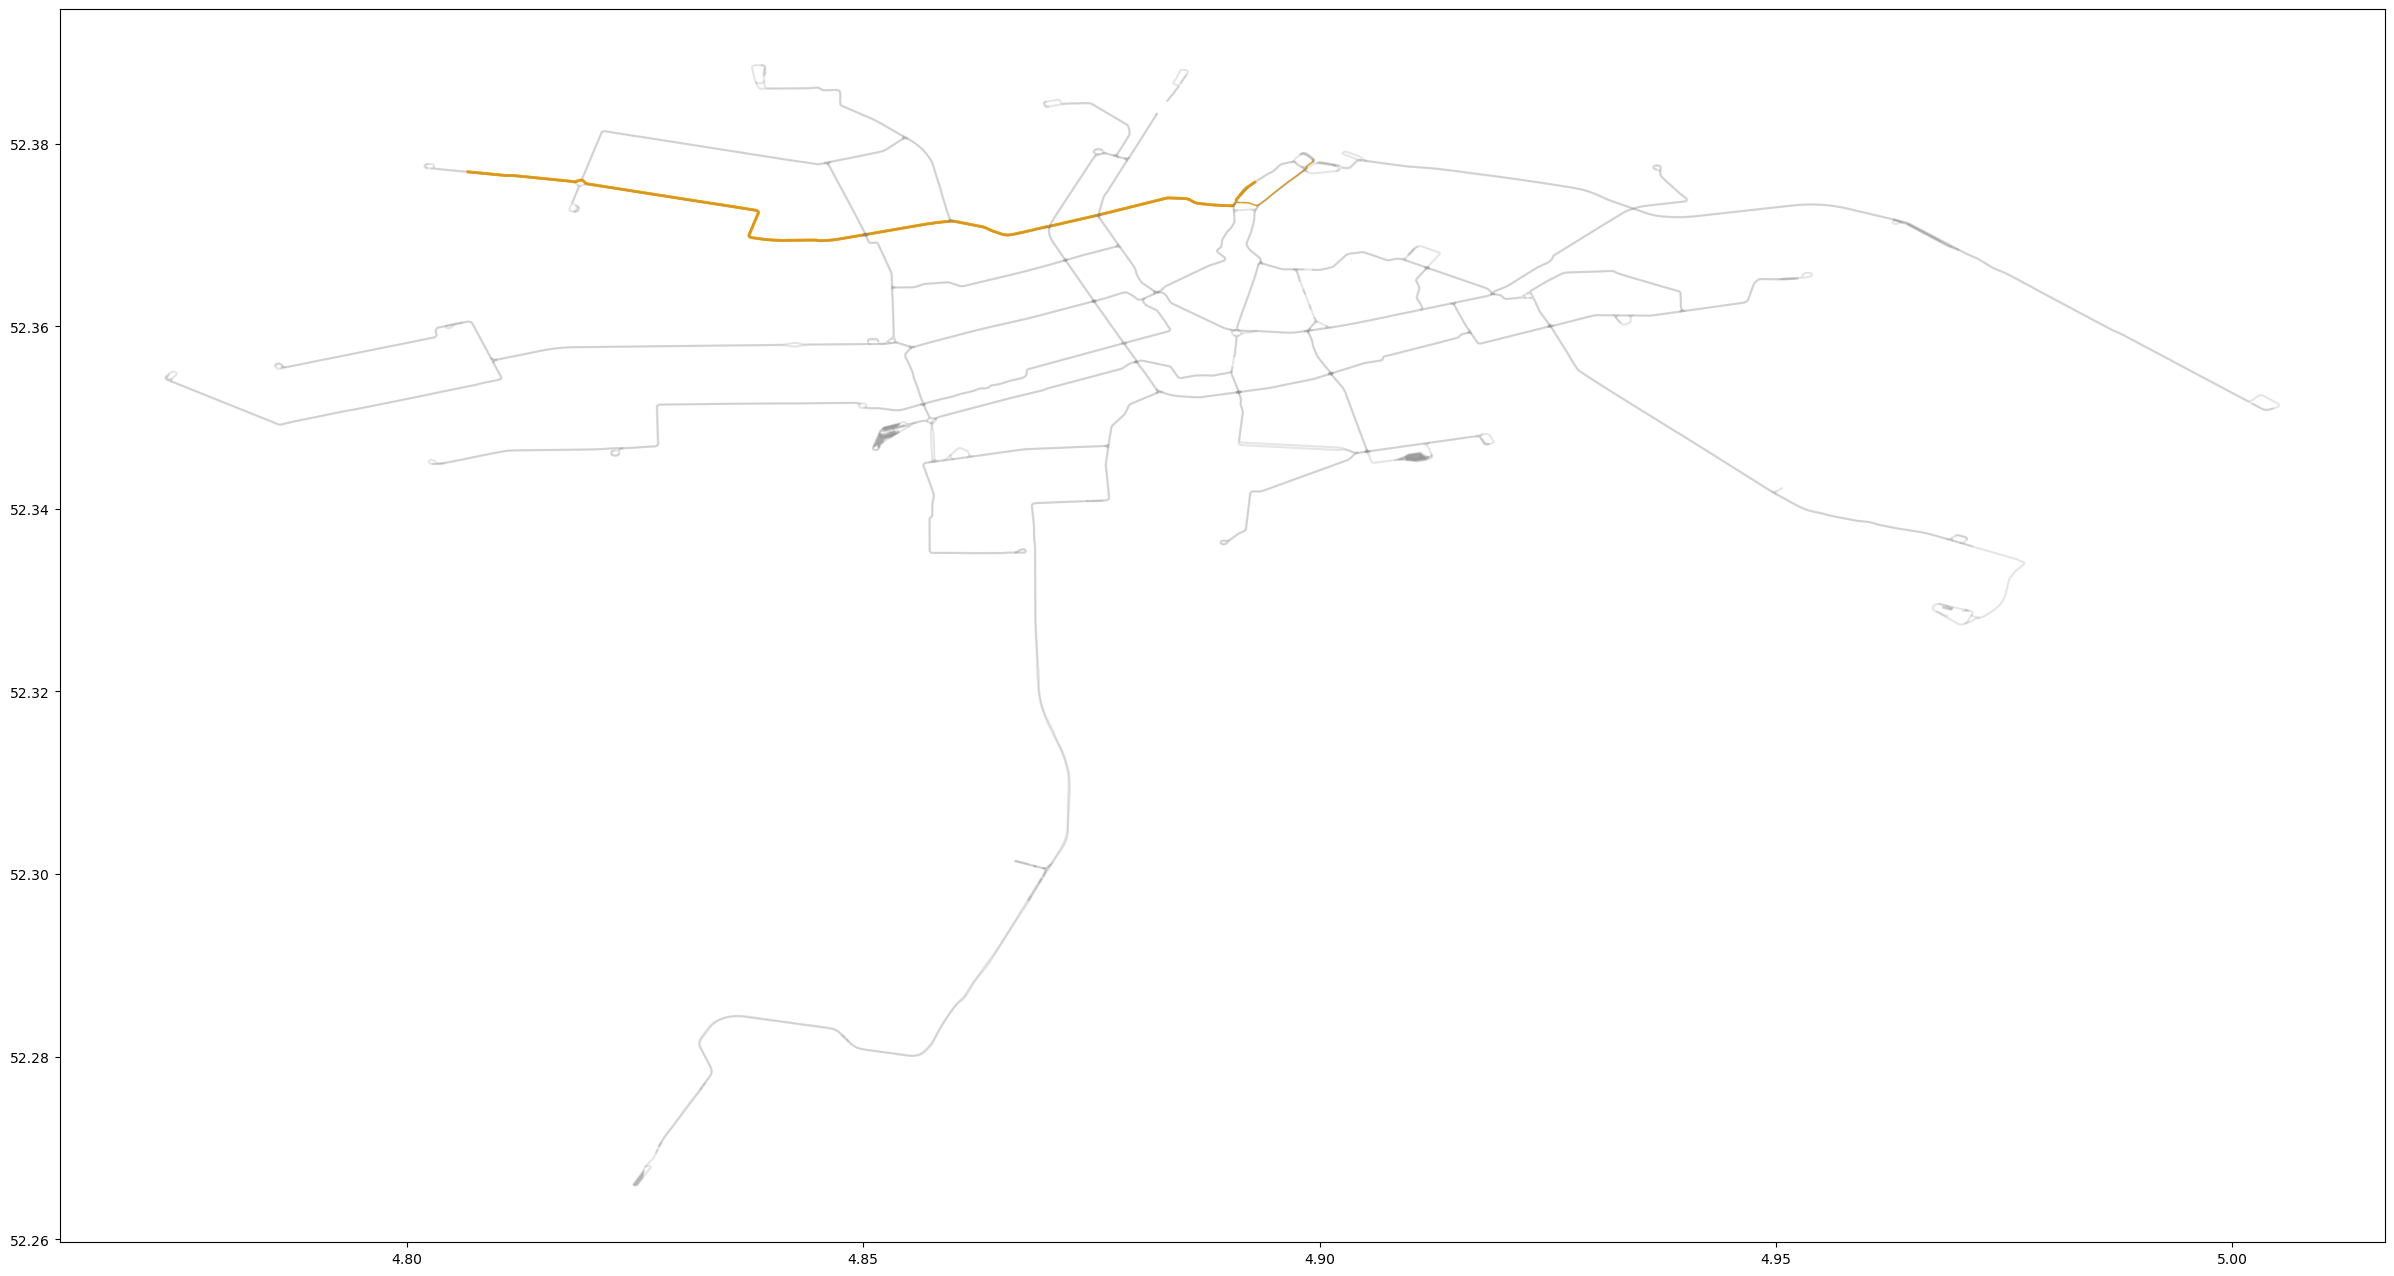

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 6: Amsterdam 6 -- s-transfer, e-transfer, s_e has totally same routes

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.872679526320679,
    's_coordinates_y': 52.3408585572296, 
    'e_coordinates_x': 4.870299303894314, 
    'e_coordinates_y': 52.304099852190696
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
295,POINT (4.87318 52.34082),2,200,Station Zuid,4.873185,52.340817,"(4.8731849, 52.3408165)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,tram,"25, 5","25, 5"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
287,POINT (4.87163 52.30279),2,1519,Oranjebaan,4.871633,52.302794,"(4.8716334, 52.3027943)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,tram,"25, 5","25, 5"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on several same routes 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  25
1   5



,ref
0,25
1,5


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   25             Westwijk  POINT (4.8305377 52.2743532)  4.830538   
 1    7         Sacharovlaan  POINT (4.8323277 52.2821847)  4.832328   
 2    1         Poortwachter  POINT (4.8450525 52.2833338)  4.845053   
 3    2                Brink  POINT (4.8513367 52.2806292)  4.851337   
 4    3                Meent  POINT (4.8569707 52.2808905)  4.856971   
 5   13            Sportlaan    POINT (4.863249 52.289791)  4.863249   
 6    8      Ouderkerkerlaan  POINT (4.8674156 52.2961484)  4.867416   
 7    0           Oranjebaan  POINT (4.8716334 52.3027943)  4.871633   
 8   11             Onderuit  POINT (4.8724478 52.3079604)  4.872448   
 9   15           Zonnestein  POINT (4.8723368 52.3114898)  4.872337   
 10  14           Kronenburg  POINT (4.8706466 52.3156231)  4.870647   
 11   6           Uilenstede  POINT (4.8691021 52.3212764)  4.869102   
 12   5  Van Boshuizenstraat  POINT (4.8689764 52.3248943)  4.86

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                 name                      geometry     geo_x  \
 15  12         Station Zuid  POINT (4.8731849 52.3408165)  4.873185   
 14   4         Parnassusweg  POINT (4.8686793 52.3382075)  4.868679   
 13  10    A. J. Ernststraat  POINT (4.8688168 52.3325431)  4.868817   
 12   5  Van Boshuizenstraat  POINT (4.8689764 52.3248943)  4.868976   
 11   6           Uilenstede  POINT (4.8691021 52.3212764)  4.869102   
 10  14           Kronenburg  POINT (4.8706466 52.3156231)  4.870647   
 9   15           Zonnestein  POINT (4.8723368 52.3114898)  4.872337   
 8   11             Onderuit  POINT (4.8724478 52.3079604)  4.872448   
 7    0           Oranjebaan  POINT (4.8716334 52.3027943)  4.871633   
 
         geo_y                                    route_name_list ref route  \
 15  52.340817  Tram 25: Amsterdam Station Zuid => Amstelveen ...  25  tram   
 14  52.338208  Tram 25: Amsterdam Station Zuid => Amstelveen ...  25  tram   
 13  52.332543  Tram 25: Amsterdam Statio

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0  1519  1843
 1  1843  1882
 2  1882  1881
 3  1881   610
 4   610  1560
 5  1560  1841
 6  1841  1543
 7  1543   200,
    s_id  e_id
 0  1519  1843
 1  1843  1882
 2  1882  1881
 3  1881   610
 4   610  1560
 5  1560  1841
 6  1841  1543
 7  1543   200]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0  1519  1843
 1  1843  1882
 2  1882  1881
 3  1881   610
 4   610  1560
 5  1560  1841
 6  1841  1543
 7  1543   200]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
299,27774130,"LINESTRING (4.8719898 52.3034465, 4.8718865 52...",tram,None,299,341,342,47.838035,0.003417,47,"(341, 342)","(342, 341)"
307,28216647,"LINESTRING (4.8717836 52.3030355, 4.8716334 52...",tram,None,307,342,1519,28.722452,0.002052,28,"(342, 1519)","(1519, 342)"
594,181982954,"LINESTRING (4.8724478 52.3079604, 4.8724463 52...",tram,None,594,1843,341,504.622802,0.036044,504,"(1843, 341)","(341, 1843)"
593,181982954,"LINESTRING (4.8723368 52.3114898, 4.8724247 52...",tram,None,593,1882,1843,393.385391,0.028099,393,"(1882, 1843)","(1843, 1882)"
592,181982954,"LINESTRING (4.8706466 52.3156231, 4.8706989 52...",tram,None,592,1881,1882,474.940170,0.033924,474,"(1881, 1882)","(1882, 1881)"
591,181982954,"LINESTRING (4.8691021 52.3212764, 4.8691447 52...",tram,None,591,610,1881,639.937135,0.045710,639,"(610, 1881)","(1881, 610)"
296,27773788,"LINESTRING (4.8689764 52.3248943, 4.8689824 52...",tram,None,296,1560,338,231.281953,0.016520,231,"(1560, 338)","(338, 1560)"
297,27773932,"LINESTRING (4.8690499 52.3228159, 4.869054 52....",tram,None,297,338,339,16.901358,0.001207,16,"(338, 339)","(339, 338)"
298,27773939,"LINESTRING (4.869054 52.322664, 4.8690875 52.3...",tram,None,298,339,340,114.800498,0.008200,114,"(339, 340)","(340, 339)"
300,27810999,"LINESTRING (4.8690875 52.3216323, 4.8690987 52...",tram,None,300,340,343,21.662925,0.001547,21,"(340, 343)","(343, 340)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,27774130,"LINESTRING (4.8719898 52.3034465, 4.8718865 52...",tram,None,299,341,342,47.838035,0.003417,47,"(341, 342)","(342, 341)",1.0
1,28216647,"LINESTRING (4.8717836 52.3030355, 4.8716334 52...",tram,None,307,342,1519,28.722452,0.002052,28,"(342, 1519)","(1519, 342)",1.0
2,181982954,"LINESTRING (4.8724478 52.3079604, 4.8724463 52...",tram,None,594,1843,341,504.622802,0.036044,504,"(1843, 341)","(341, 1843)",1.0
3,181982954,"LINESTRING (4.8723368 52.3114898, 4.8724247 52...",tram,None,593,1882,1843,393.385391,0.028099,393,"(1882, 1843)","(1843, 1882)",1.0
4,181982954,"LINESTRING (4.8706466 52.3156231, 4.8706989 52...",tram,None,592,1881,1882,474.940170,0.033924,474,"(1881, 1882)","(1882, 1881)",1.0
5,181982954,"LINESTRING (4.8691021 52.3212764, 4.8691447 52...",tram,None,591,610,1881,639.937135,0.045710,639,"(610, 1881)","(1881, 610)",1.0
6,27773788,"LINESTRING (4.8689764 52.3248943, 4.8689824 52...",tram,None,296,1560,338,231.281953,0.016520,231,"(1560, 338)","(338, 1560)",1.0
7,27773932,"LINESTRING (4.8690499 52.3228159, 4.869054 52....",tram,None,297,338,339,16.901358,0.001207,16,"(338, 339)","(339, 338)",1.0
8,27773939,"LINESTRING (4.869054 52.322664, 4.8690875 52.3...",tram,None,298,339,340,114.800498,0.008200,114,"(339, 340)","(340, 339)",1.0
9,27810999,"LINESTRING (4.8690875 52.3216323, 4.8690987 52...",tram,None,300,340,343,21.662925,0.001547,21,"(340, 343)","(343, 340)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.3253916551361544

<Axes: >

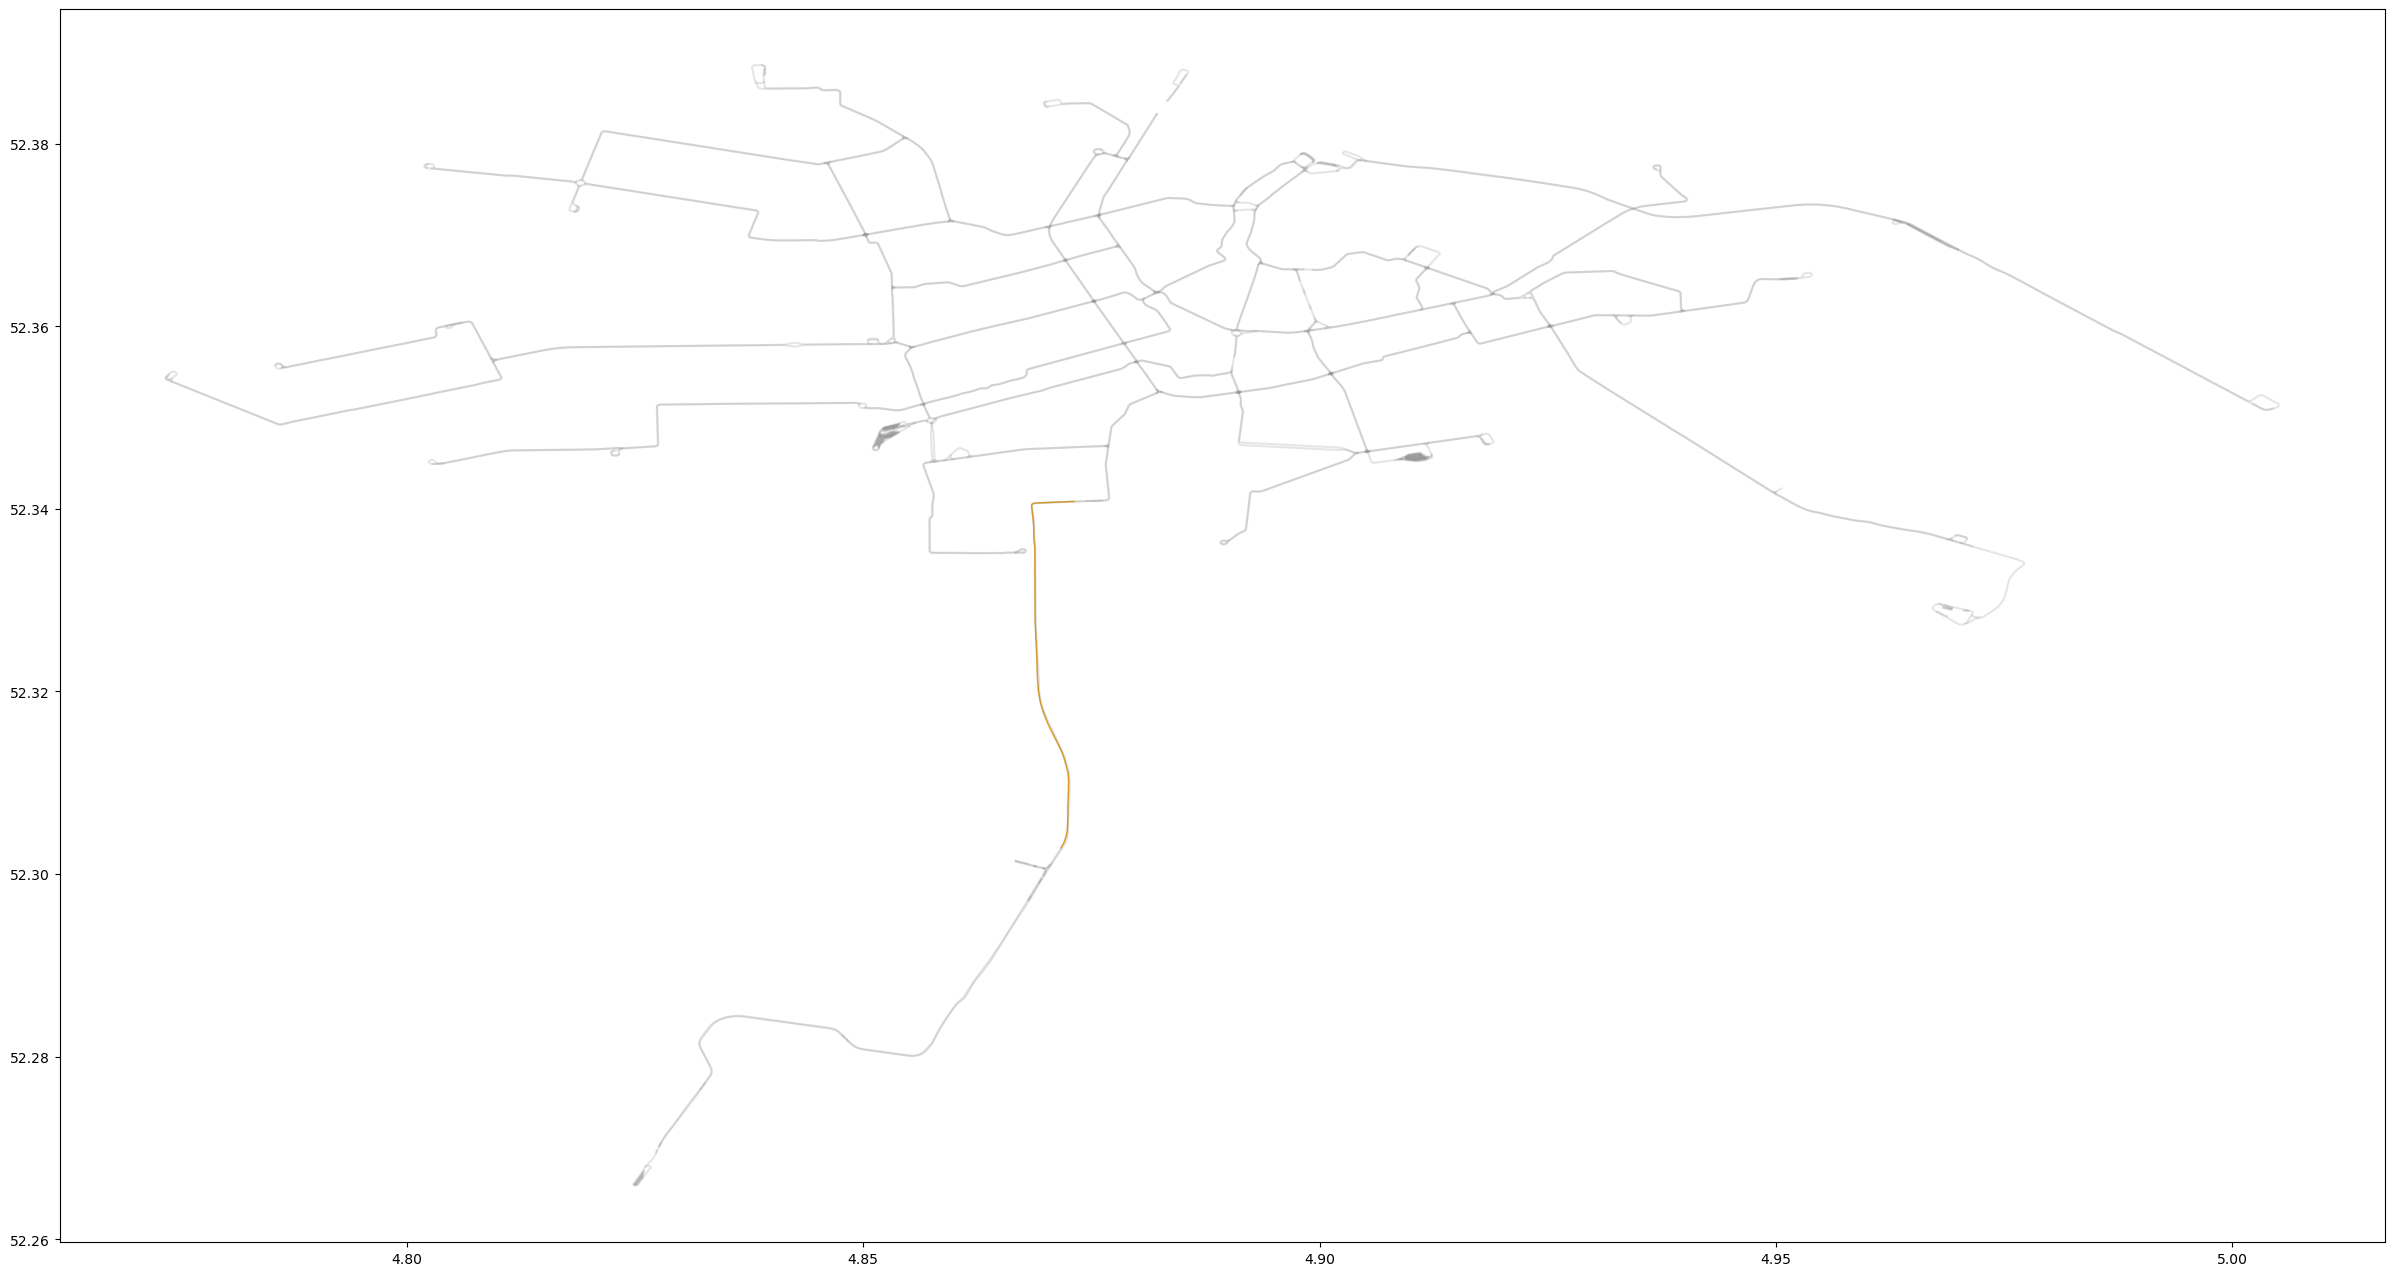

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 5: Amsterdam 5 -- s-transfer, e-transfer, s_e has partially same routes

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.877178919758245,
    's_coordinates_y': 52.36927745355788, 
    'e_coordinates_x': 4.908685188573216, 
    'e_coordinates_y': 52.361043896315444
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
164,POINT (4.87756 52.36953),2,1653,Elandsgracht,4.877558,52.369527,"(4.8775579, 52.3695272)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 19, 5, 7","17, 19, 5, 7"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
30,POINT (4.90916 52.36140),2,1581,Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 19, 7","1, 19, 7"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Some of e_on_route is the same as some of s_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
1  19
3   7



,ref
1,19
3,7


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   52                      Sniep  POINT (4.9697229 52.3364299)  4.969723   
 1   26                 Diemerbrug  POINT (4.9613021 52.3382375)  4.961302   
 2   13         Arent Krijtsstraat    POINT (4.9546574 52.33957)  4.954657   
 3   44                Brinkstraat  POINT (4.9478959 52.3428971)  4.947896   
 4    3                  Kruislaan  POINT (4.9398853 52.3479273)  4.939885   
 5   43          Hugo de Vrieslaan    POINT (4.934801 52.351066)  4.934801   
 6   27                    Hogeweg  POINT (4.9310414 52.3534088)  4.931041   
 7   12                  Oostpoort  POINT (4.9269018 52.3574383)  4.926902   
 8   11          Wijttenbachstraat   POINT (4.9250867 52.360259)  4.925087   
 9   10   Eerste Van Swindenstraat  POINT (4.9238286 52.3621936)  4.923829   
 10   9             Alexanderplein  POINT (4.9196097 52.3634343)   4.91961   
 11  28  Korte 's-Gravesandestraat  POINT (4.9141489 52.3624363)

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id            name                      geometry     geo_x      geo_y  \
 17   4    Elandsgracht  POINT (4.8784804 52.3681689)   4.87848  52.368169   
 16   5     Leidseplein  POINT (4.8830722 52.3634714)  4.883072  52.363471   
 15  21     Rijksmuseum  POINT (4.8873395 52.3608307)   4.88734  52.360831   
 14  25    Vijzelgracht  POINT (4.8925358 52.3594772)  4.892536  52.359477   
 13  24  Frederiksplein  POINT (4.9000102 52.3596835)   4.90001  52.359684   
 12   0    Weesperplein  POINT (4.9091584 52.3614042)  4.909158  52.361404   
 
                                   route_name_list ref route  \
 17  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 16  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 15  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 14  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 13  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 12  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 
  

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0  1581  1340
 1  1340  1874
 2  1874  1806
 3  1806  1696
 4  1696  1664,
    s_id  e_id
 0  1581  1340
 1  1340  1874
 2  1874  1806
 3  1806  1696
 4  1696  1664]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0  1581  1340
 1  1340  1874
 2  1874  1806
 3  1806  1696
 4  1696  1664]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
312,29272593,"LINESTRING (4.9034372 52.36024, 4.9045977 52.3...",tram,None,312,351,352,82.839311,0.005917,82,"(351, 352)","(352, 351)"
1196,379148752,"LINESTRING (4.9045977 52.3604628, 4.9047048 52...",tram,None,1196,352,1581,327.843533,0.023417,327,"(352, 1581)","(1581, 352)"
1503,611803438,"LINESTRING (4.9005646 52.3597612, 4.9006313 52...",tram,None,1503,888,351,202.832037,0.014488,202,"(888, 351)","(351, 888)"
2051,813274520,"LINESTRING (4.9000102 52.3596835, 4.9005646 52...",tram,None,2051,1340,888,38.738587,0.002767,38,"(1340, 888)","(888, 1340)"
1504,611803444,"LINESTRING (4.8982924 52.3594477, 4.8983995 52...",tram,None,1504,508,1252,50.793155,0.003628,50,"(508, 1252)","(1252, 508)"
1505,611803444,"LINESTRING (4.8990199 52.3595478, 4.8991102 52...",tram,None,1505,1252,1249,17.951799,0.001282,17,"(1252, 1249)","(1249, 1252)"
1518,611884640,"LINESTRING (4.8925358 52.3594772, 4.8926793 52...",tram,None,1518,1874,1248,45.740187,0.003267,45,"(1874, 1248)","(1248, 1874)"
1836,770403863,"LINESTRING (4.8992767 52.3595841, 4.9000102 52...",tram,None,1836,1249,1340,51.170148,0.003655,51,"(1249, 1340)","(1340, 1249)"
1837,770403864,"LINESTRING (4.8932064 52.3594732, 4.8962177 52...",tram,None,1837,1248,508,348.915130,0.024923,348,"(1248, 508)","(508, 1248)"
240,27080498,"LINESTRING (4.8881562 52.360444, 4.889257 52.3...",tram,None,240,291,44,166.265530,0.011876,166,"(291, 44)","(44, 291)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,29272593,"LINESTRING (4.9034372 52.36024, 4.9045977 52.3...",tram,None,312,351,352,82.839311,0.005917,82,"(351, 352)","(352, 351)",1.0
1,379148752,"LINESTRING (4.9045977 52.3604628, 4.9047048 52...",tram,None,1196,352,1581,327.843533,0.023417,327,"(352, 1581)","(1581, 352)",1.0
2,611803438,"LINESTRING (4.9005646 52.3597612, 4.9006313 52...",tram,None,1503,888,351,202.832037,0.014488,202,"(888, 351)","(351, 888)",1.0
3,813274520,"LINESTRING (4.9000102 52.3596835, 4.9005646 52...",tram,None,2051,1340,888,38.738587,0.002767,38,"(1340, 888)","(888, 1340)",1.0
4,611803444,"LINESTRING (4.8982924 52.3594477, 4.8983995 52...",tram,None,1504,508,1252,50.793155,0.003628,50,"(508, 1252)","(1252, 508)",1.0
5,611803444,"LINESTRING (4.8990199 52.3595478, 4.8991102 52...",tram,None,1505,1252,1249,17.951799,0.001282,17,"(1252, 1249)","(1249, 1252)",1.0
6,611884640,"LINESTRING (4.8925358 52.3594772, 4.8926793 52...",tram,None,1518,1874,1248,45.740187,0.003267,45,"(1874, 1248)","(1248, 1874)",1.0
7,770403863,"LINESTRING (4.8992767 52.3595841, 4.9000102 52...",tram,None,1836,1249,1340,51.170148,0.003655,51,"(1249, 1340)","(1340, 1249)",1.0
8,770403864,"LINESTRING (4.8932064 52.3594732, 4.8962177 52...",tram,None,1837,1248,508,348.915130,0.024923,348,"(1248, 508)","(508, 1248)",1.0
9,27080498,"LINESTRING (4.8881562 52.360444, 4.889257 52.3...",tram,None,240,291,44,166.265530,0.011876,166,"(291, 44)","(44, 291)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.18766799872369722

<Axes: >

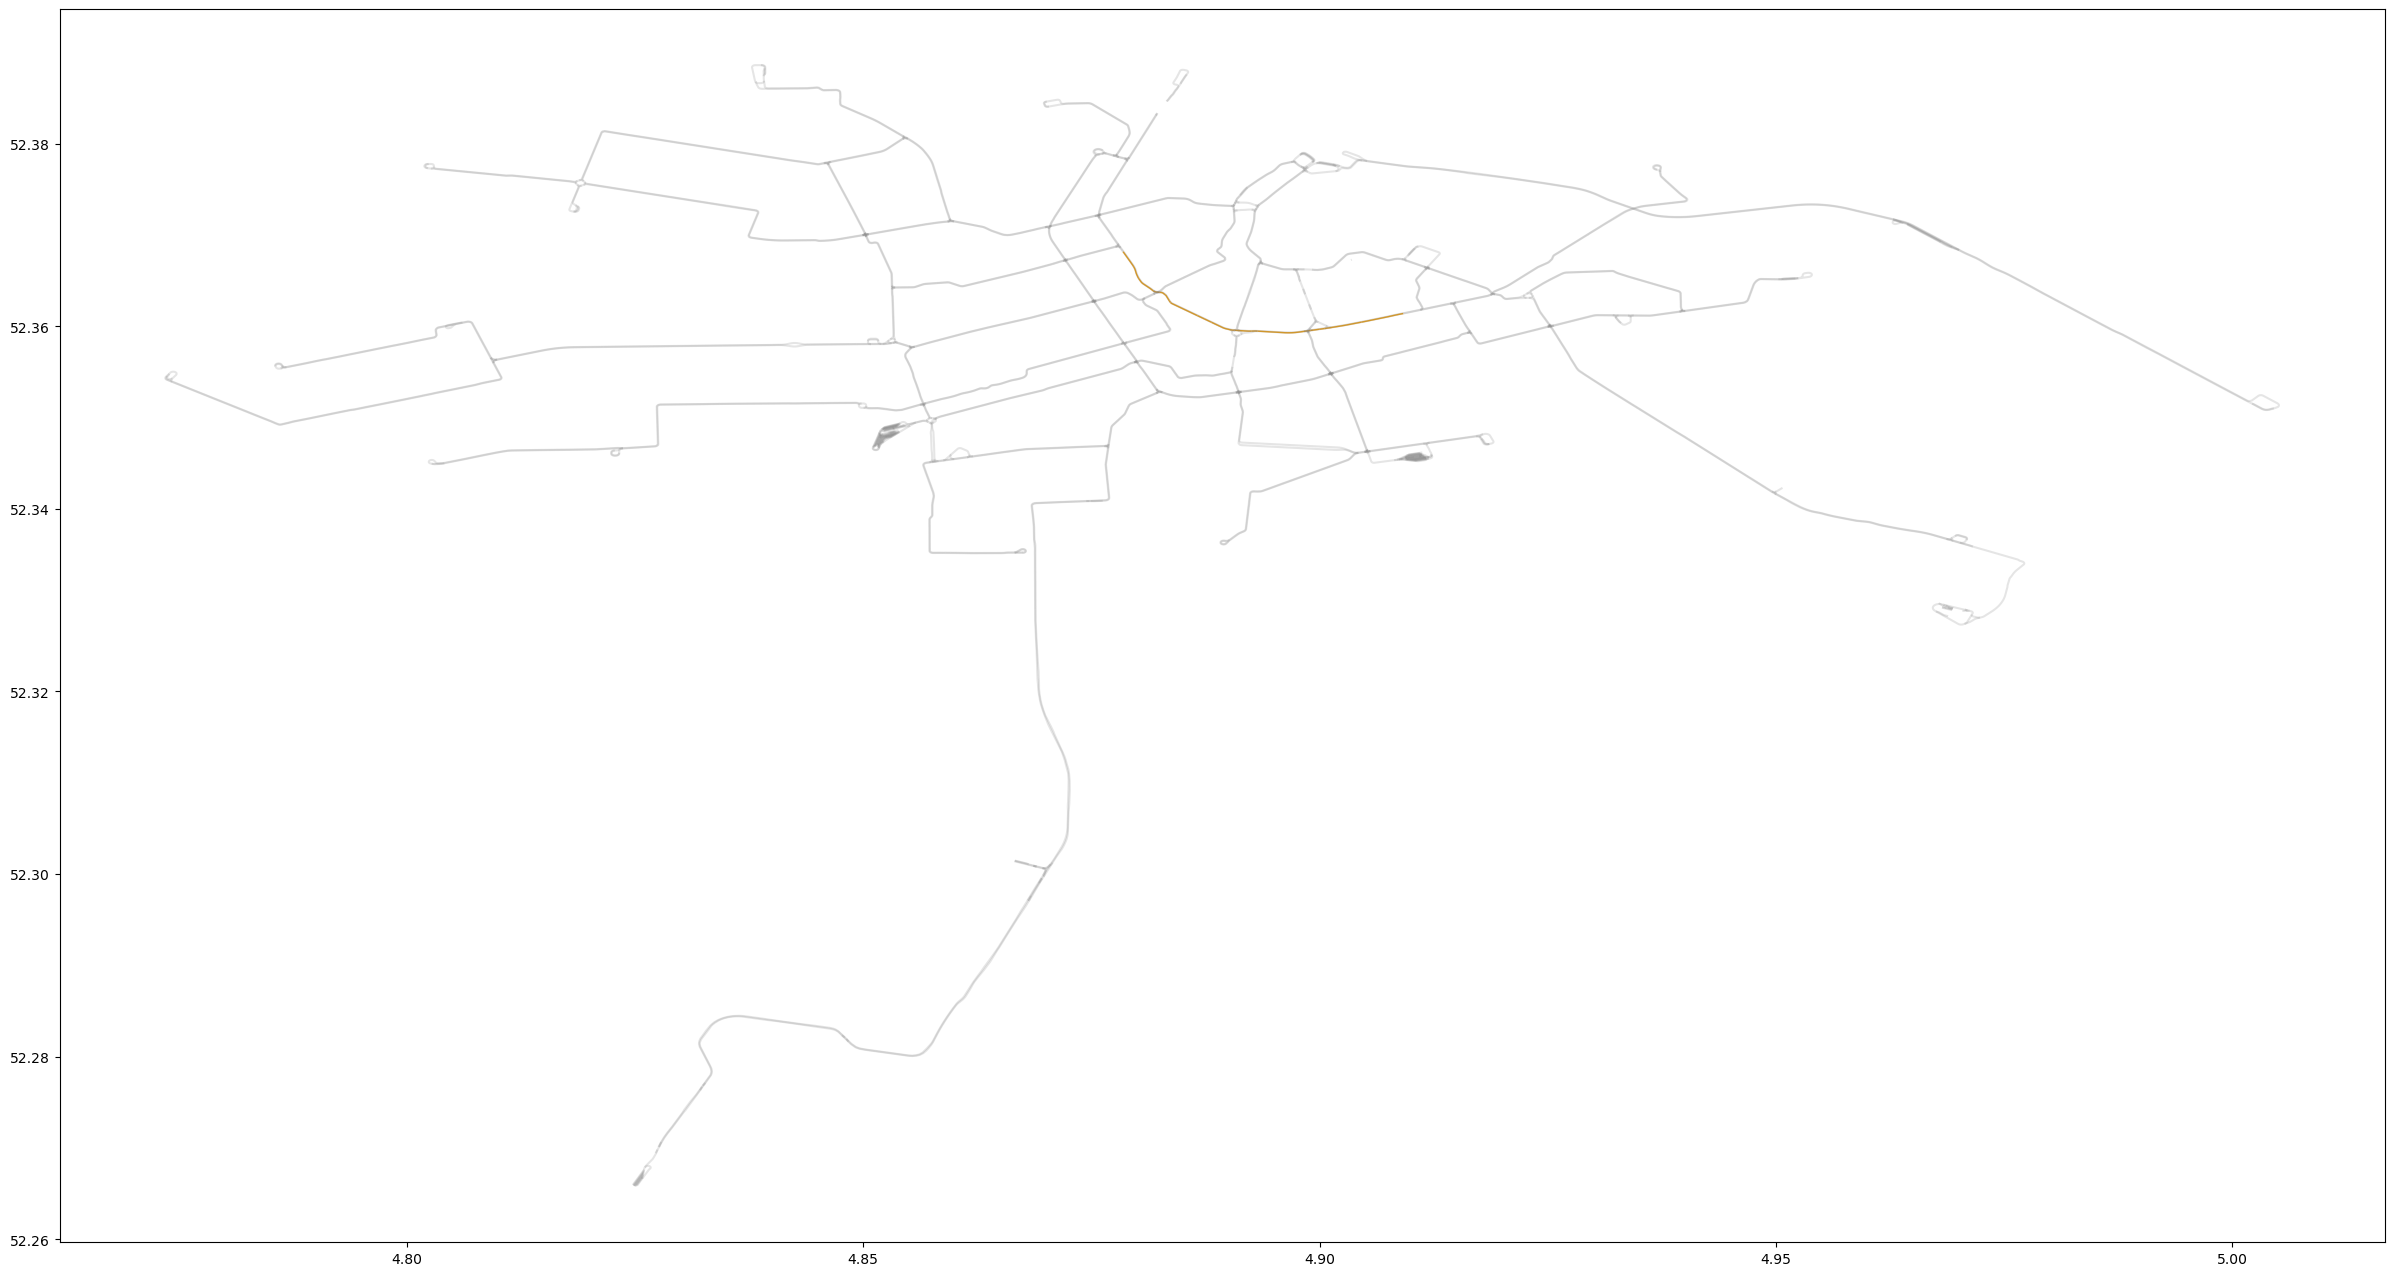

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 4: Amsterdam 4 -- s-transfer, e-no transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.908694409536675,
    's_coordinates_y': 52.36103118769003 , 
    'e_coordinates_x':  4.774425370057379, 
    'e_coordinates_y': 52.353679369990765
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
30,POINT (4.90916 52.36140),2,1581,Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 19, 7","1, 19, 7"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.77450 52.35387),2,847,Matterhorn,4.774504,52.353869,"(4.7745043, 52.3538687)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   1



,ref
0,1


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                              name                      geometry  \
 0   42                        Matterhorn  POINT (4.7745043 52.3538687)   
 1    8                           Pilatus   POINT (4.7770976 52.352828)   
 2    9                       Inaristraat  POINT (4.7836582 52.3501979)   
 3   39                          Ecuplein  POINT (4.7881565 52.3496994)   
 4   38                   Baden Powellweg  POINT (4.7944986 52.3509515)   
 5   36                          Hoekenes  POINT (4.8018381 52.3524376)   
 6   41                Louis Davidsstraat  POINT (4.8084929 52.3538423)   
 7   19                     Meer en Vaart    POINT (4.8099119 52.35637)   
 8   40                Johan Huizingalaan  POINT (4.8258953 52.3578123)   
 9   20                  Station Lelylaan  POINT (4.8337835 52.3579004)   
 10  12                 Derkinderenstraat  POINT (4.8397482 52.3579573)   
 11   2                     Surinameplein  POINT (4.8509943 52.3580728)   
 12  10              Rhij

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                              name                      geometry  \
 19   3                      Weesperplein  POINT (4.9071213 52.3610021)   
 18  22                    Frederiksplein  POINT (4.8978483 52.3594109)   
 17   5                      Vijzelgracht  POINT (4.8921024 52.3595051)   
 16   1                       Rijksmuseum   POINT (4.887104 52.3609734)   
 15  23                       Leidseplein  POINT (4.8810698 52.3632085)   
 14  13  Eerste Constantijn Huygensstraat  POINT (4.8747145 52.3626163)   
 13  24            Jan Pieter Heijestraat   POINT (4.8657924 52.360364)   
 12  10              Rhijnvis Feithstraat  POINT (4.8603541 52.3590503)   
 11   2                     Surinameplein  POINT (4.8509943 52.3580728)   
 10  12                 Derkinderenstraat  POINT (4.8397482 52.3579573)   
 9   20                  Station Lelylaan  POINT (4.8337835 52.3579004)   
 8   40                Johan Huizingalaan  POINT (4.8258953 52.3578123)   
 7   19                  

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0    847  1615
 1   1615  1616
 2   1616  1777
 3   1777  1776
 4   1776  1686
 5   1686  1783
 6   1783  1784
 7   1784  1780
 8   1780  1786
 9   1786  1687
 10  1687  1536
 11  1536  1628
 12  1628  1891
 13  1891  1690
 14  1690  1871
 15  1871  1514
 16  1514  1599
 17  1599  1254
 18  1254  1580]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0    847  1615
 1   1615  1616
 2   1616  1777
 3   1777  1776
 4   1776  1686
 5   1686  1783
 6   1783  1784
 7   1784  1780
 8   1780  1786
 9   1786  1687
 10  1687  1536
 11  1536  1628
 12  1628  1891
 13  1891  1690
 14  1690  1871
 15  1871  1514
 16  1514  1599
 17  1599  1254
 18  1254  1580]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
862,322841927,"LINESTRING (4.7770976 52.352828, 4.7768625 52....",tram,None,862,1615,847,211.216649,0.015087,211,"(1615, 847)","(847, 1615)"
861,322841927,"LINESTRING (4.7836582 52.3501979, 4.7833776 52...",tram,None,861,1616,1615,534.194272,0.038157,534,"(1616, 1615)","(1615, 1616)"
145,26594761,"LINESTRING (4.785218 52.3495798, 4.7849725 52....",tram,None,145,189,190,19.922393,0.001423,19,"(189, 190)","(190, 189)"
836,322841907,"LINESTRING (4.7881565 52.3496994, 4.7880725 52...",tram,None,836,1777,189,219.740519,0.015696,219,"(1777, 189)","(189, 1777)"
860,322841927,"LINESTRING (4.7849725 52.3496771, 4.7836582 52...",tram,None,860,190,1616,106.649119,0.007618,106,"(190, 1616)","(1616, 190)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1499,611696264,"LINESTRING (4.9071213 52.3610021, 4.9064489 52...",tram,None,1499,1580,524,181.999951,0.013000,181,"(1580, 524)","(524, 1580)"
1500,611696265,"LINESTRING (4.9033075 52.3602416, 4.9031395 52...",tram,None,1500,641,902,143.413320,0.010244,143,"(641, 902)","(902, 641)"
1817,759979466,"LINESTRING (4.8985364 52.3595071, 4.8984184 52...",tram,None,1817,995,47,15.921247,0.001137,15,"(995, 47)","(47, 995)"
1835,770403859,"LINESTRING (4.9012799 52.359895, 4.9012135 52....",tram,None,1835,902,994,149.522724,0.010680,149,"(902, 994)","(994, 902)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,322841927,"LINESTRING (4.7770976 52.352828, 4.7768625 52....",tram,None,862,1615,847,211.216649,0.015087,211,"(1615, 847)","(847, 1615)",1.0
1,322841927,"LINESTRING (4.7836582 52.3501979, 4.7833776 52...",tram,None,861,1616,1615,534.194272,0.038157,534,"(1616, 1615)","(1615, 1616)",1.0
2,26594761,"LINESTRING (4.785218 52.3495798, 4.7849725 52....",tram,None,145,189,190,19.922393,0.001423,19,"(189, 190)","(190, 189)",1.0
3,322841907,"LINESTRING (4.7881565 52.3496994, 4.7880725 52...",tram,None,836,1777,189,219.740519,0.015696,219,"(1777, 189)","(189, 1777)",1.0
4,322841927,"LINESTRING (4.7849725 52.3496771, 4.7836582 52...",tram,None,860,190,1616,106.649119,0.007618,106,"(190, 1616)","(1616, 190)",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,611696264,"LINESTRING (4.9071213 52.3610021, 4.9064489 52...",tram,None,1499,1580,524,181.999951,0.013000,181,"(1580, 524)","(524, 1580)",1.0
72,611696265,"LINESTRING (4.9033075 52.3602416, 4.9031395 52...",tram,None,1500,641,902,143.413320,0.010244,143,"(641, 902)","(902, 641)",1.0
73,759979466,"LINESTRING (4.8985364 52.3595071, 4.8984184 52...",tram,None,1817,995,47,15.921247,0.001137,15,"(995, 47)","(47, 995)",1.0
74,770403859,"LINESTRING (4.9012799 52.359895, 4.9012135 52....",tram,None,1835,902,994,149.522724,0.010680,149,"(902, 994)","(994, 902)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.7156568295179021

<Axes: >

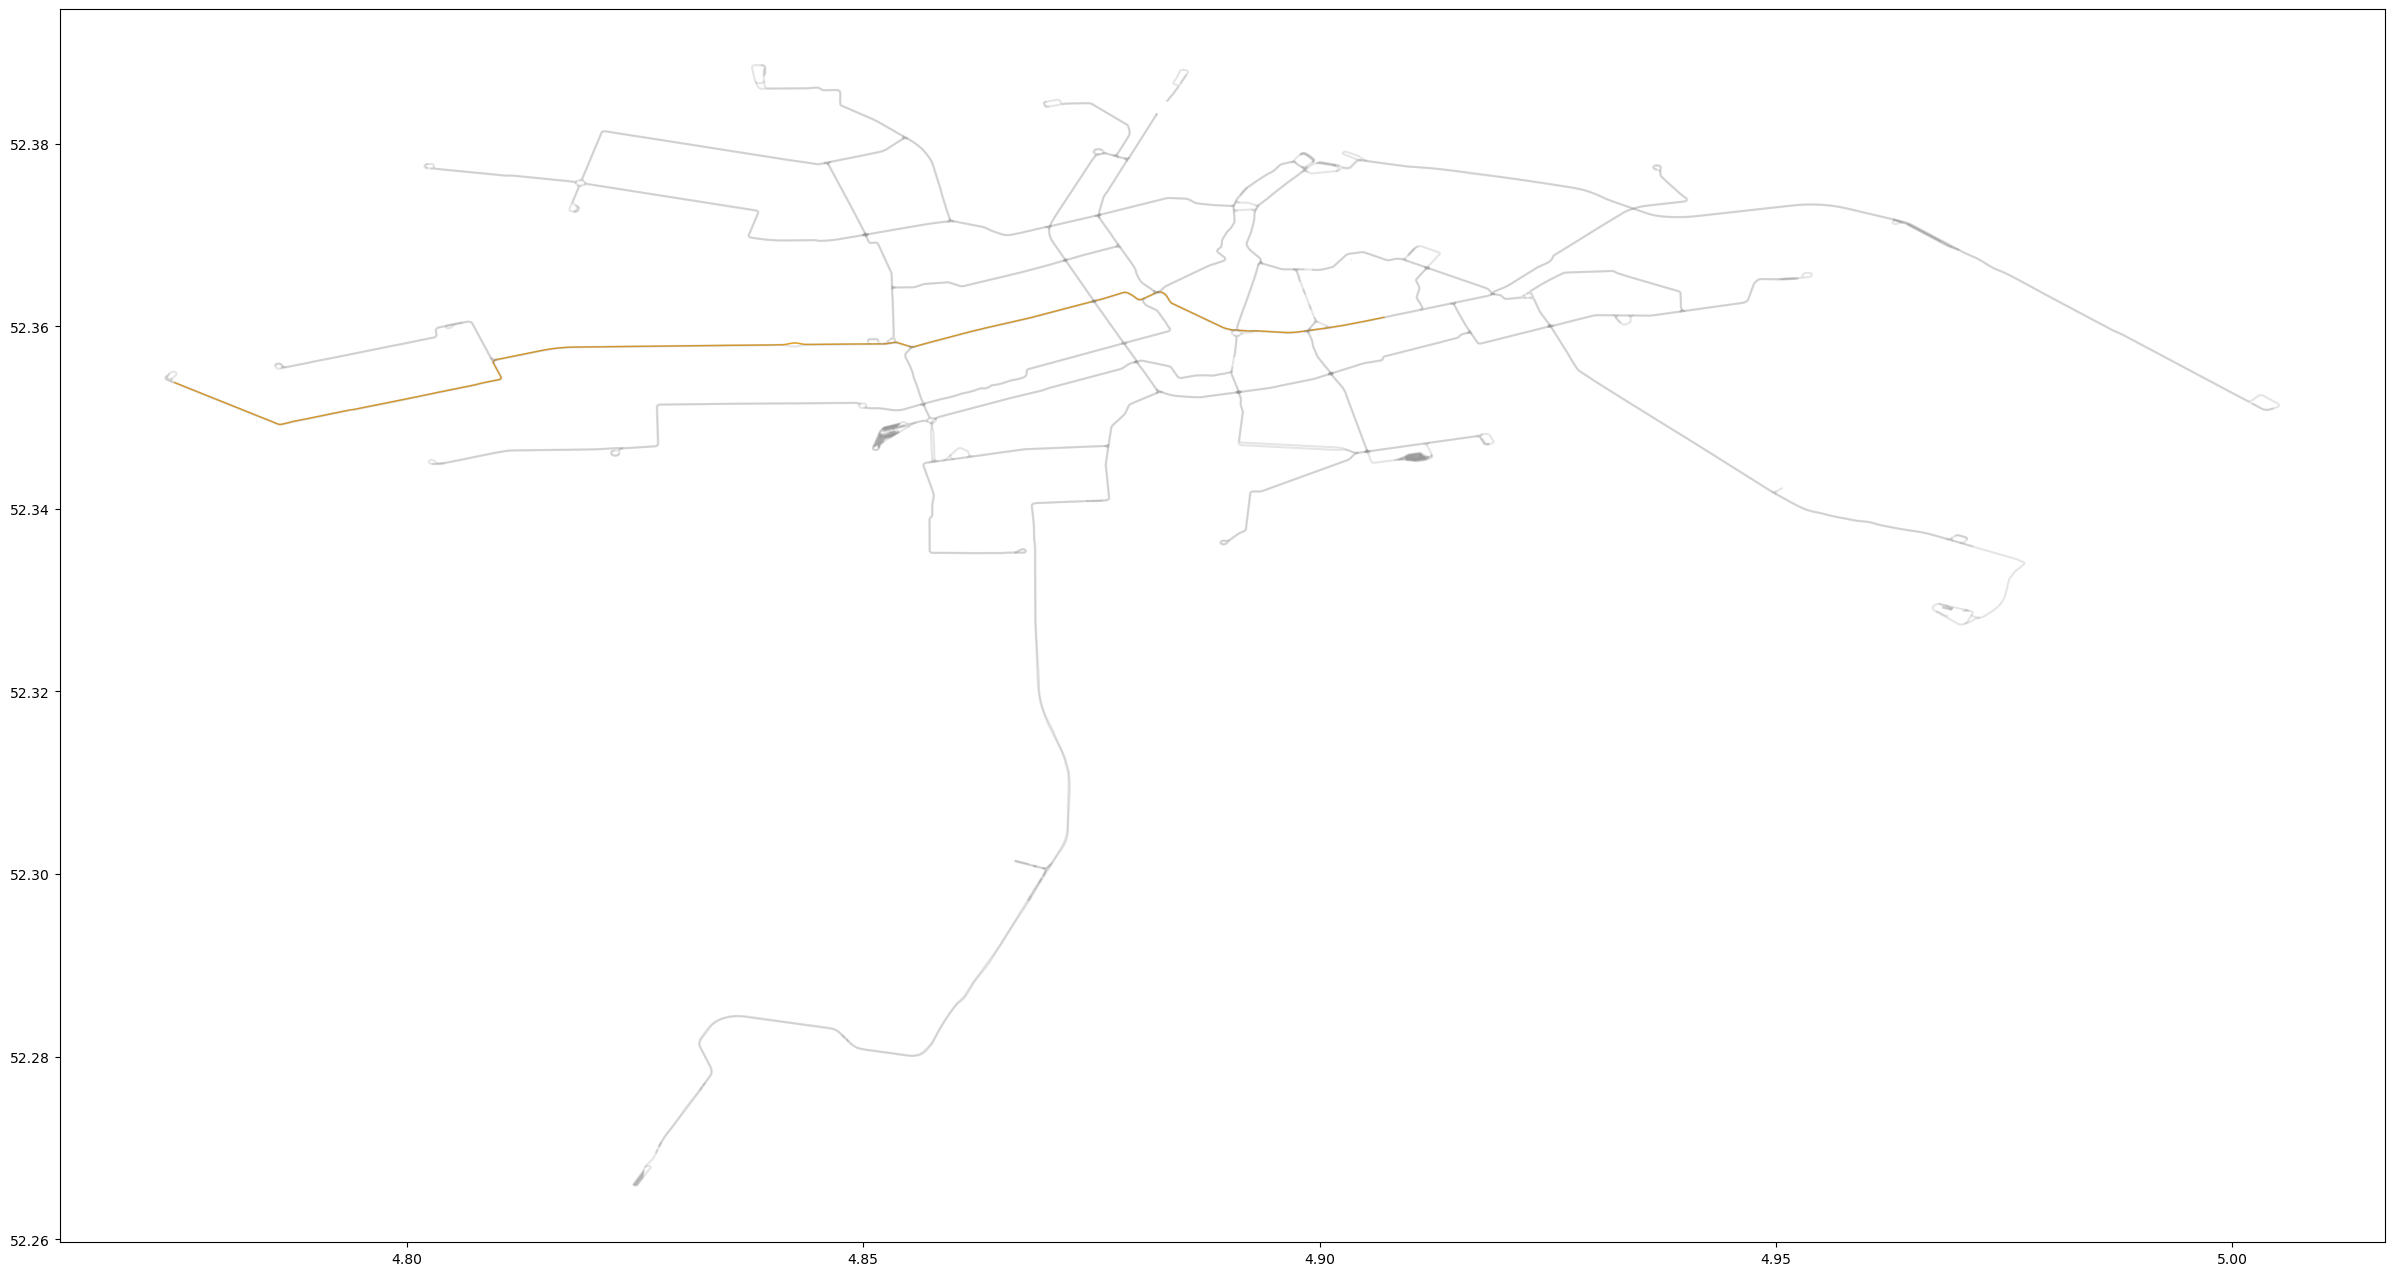

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 3: Amsterdam 3 -- s-transfer, e-no transfer, s_e has one same route ---  line7 exists some questions

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.9069005233527205, 
    's_coordinates_y': 52.361168925103094, 
    'e_coordinates_x':  4.819591062917035, 
    'e_coordinates_y': 52.37340576910413
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
19,POINT (4.90712 52.36100),2,1580,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
383,POINT (4.81860 52.37284),2,222,Sloterpark,4.818602,52.372845,"(4.8186019, 52.3728449)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


In [28]:
s_on_route_ref

,ref
0,1
1,19
2,7


In [29]:
e_on_route_ref

,ref
0,7


### Find those same routes

In [30]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
2   7



,ref
2,7


### Get all stations between s_e nodes and transfer nodes

In [31]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1   10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2   43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3   45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4   13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5   15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6   41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7   55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8   11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)  4.849979   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)

In [32]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                       name                      geometry     geo_x  \
 20   4               Weesperplein  POINT (4.9071213 52.3610021)  4.907121   
 19  22             Frederiksplein  POINT (4.8978483 52.3594109)  4.897848   
 18   8               Vijzelgracht  POINT (4.8921024 52.3595051)  4.892102   
 17   0                Rijksmuseum   POINT (4.887104 52.3609734)  4.887104   
 16  19                Leidseplein  POINT (4.8806933 52.3646825)  4.880693   
 15  17               Elandsgracht   POINT (4.8768971 52.368541)  4.876897   
 14  20           Bilderdijkstraat  POINT (4.8725518 52.3673632)  4.872552   
 13   9       Nicolaas Beetsstraat  POINT (4.8656891 52.3655426)  4.865689   
 12  21        Witte de Withstraat  POINT (4.8586095 52.3647872)   4.85861   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)  4.853179   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)

### Get all nodes and id_pairs of nodes between s_e nodes

In [33]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1514  1599
 1   1599  1254
 2   1254  1580
 3   1580  1801
 4   1801  1626
 5   1626  1710
 6   1710  1666
 7   1666  1700
 8   1700   222
 9    222  1641
 10  1641  1660
 11  1660  1665
 12  1665  1658
 13  1658  1661
 14  1661  1656
 15  1656  1833
 16  1833  1642
 17  1642  1889
 18  1889  1834
 19  1834  1534,
     s_id  e_id
 0   1581  1340
 1   1340  1874
 2   1874  1806
 3   1806  1696
 4   1696  1627
 5   1627  1625
 6   1625  1624
 7   1624  1892
 8   1892  1664
 9   1664   222
 10   222  1835
 11  1835  1888
 12  1888  1802
 13  1802  1890
 14  1890  1659
 15  1659  1668
 16  1668  1667
 17  1667  1663
 18  1663  1701]

### Calculate shortest path and plot

In [34]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

At least one dataframe in the list(btw_all_id_pairs_list) is different


In [35]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1514  1599
 1   1599  1254
 2   1254  1580
 3   1580  1801
 4   1801  1626
 5   1626  1710
 6   1710  1666
 7   1666  1700
 8   1700   222
 9    222  1641
 10  1641  1660
 11  1660  1665
 12  1665  1658
 13  1658  1661
 14  1661  1656
 15  1656  1833
 16  1833  1642
 17  1642  1889
 18  1889  1834
 19  1834  1534,
     s_id  e_id
 0   1581  1340
 1   1340  1874
 2   1874  1806
 3   1806  1696
 4   1696  1627
 5   1627  1625
 6   1625  1624
 7   1624  1892
 8   1892  1664
 9   1664   222
 10   222  1835
 11  1835  1888
 12  1888  1802
 13  1802  1890
 14  1890  1659
 15  1659  1668
 16  1668  1667
 17  1667  1663
 18  1663  1701]

In [36]:
G = create_ground_graph(edges, nodes)

In [37]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [38]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
919,323311655,"LINESTRING (4.8881128 52.3604955, 4.8880585 52...",tram,None,919,890,1514,86.878758,0.006206,86,"(890, 1514)","(1514, 890)"
926,323311660,"LINESTRING (4.8881809 52.3604632, 4.8881128 52...",tram,None,926,898,890,5.867505,0.000419,5,"(898, 890)","(890, 898)"
1514,611860982,"LINESTRING (4.890876 52.3595816, 4.8907257 52....",tram,None,1514,313,898,212.356412,0.015168,212,"(313, 898)","(898, 313)"
1520,611884641,"LINESTRING (4.8921024 52.3595051, 4.8920271 52...",tram,None,1520,1599,349,75.793422,0.005414,75,"(1599, 349)","(349, 1599)"
1846,770413340,"LINESTRING (4.8909954 52.359574, 4.890876 52.3...",tram,None,1846,349,313,8.176527,0.000584,8,"(349, 313)","(313, 349)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,324205934,"LINESTRING (4.8502847 52.3700424, 4.8502782 52...",tram,None,1036,969,121,22.801623,0.001629,22,"(969, 121)","(121, 969)"
1284,407033696,"LINESTRING (4.8503781 52.3698319, 4.8503204 52...",tram,None,1284,118,969,24.267031,0.001733,24,"(118, 969)","(969, 118)"
1710,730262170,"LINESTRING (4.852596 52.3669952, 4.8525096 52....",tram,None,1710,1834,968,21.577276,0.001541,21,"(1834, 968)","(968, 1834)"
1707,730261340,"LINESTRING (4.8531786 52.3647729, 4.8531612 52...",tram,None,1707,1534,1319,59.197668,0.004228,59,"(1534, 1319)","(1319, 1534)"


In [39]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [40]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,323311655,"LINESTRING (4.8881128 52.3604955, 4.8880585 52...",tram,None,919,890,1514,86.878758,0.006206,86,"(890, 1514)","(1514, 890)",2.0
1,323311660,"LINESTRING (4.8881809 52.3604632, 4.8881128 52...",tram,None,926,898,890,5.867505,0.000419,5,"(898, 890)","(890, 898)",2.0
2,611860982,"LINESTRING (4.890876 52.3595816, 4.8907257 52....",tram,None,1514,313,898,212.356412,0.015168,212,"(313, 898)","(898, 313)",2.0
3,611884641,"LINESTRING (4.8921024 52.3595051, 4.8920271 52...",tram,None,1520,1599,349,75.793422,0.005414,75,"(1599, 349)","(349, 1599)",2.0
4,770413340,"LINESTRING (4.8909954 52.359574, 4.890876 52.3...",tram,None,1846,349,313,8.176527,0.000584,8,"(349, 313)","(313, 349)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,324205934,"LINESTRING (4.8502847 52.3700424, 4.8502782 52...",tram,None,1036,969,121,22.801623,0.001629,22,"(969, 121)","(121, 969)",1.0
163,407033696,"LINESTRING (4.8503781 52.3698319, 4.8503204 52...",tram,None,1284,118,969,24.267031,0.001733,24,"(118, 969)","(969, 118)",1.0
164,730262170,"LINESTRING (4.852596 52.3669952, 4.8525096 52....",tram,None,1710,1834,968,21.577276,0.001541,21,"(1834, 968)","(968, 1834)",1.0
165,730261340,"LINESTRING (4.8531786 52.3647729, 4.8531612 52...",tram,None,1707,1534,1319,59.197668,0.004228,59,"(1534, 1319)","(1319, 1534)",1.0


In [41]:
shortest_path_edges_way.time.sum()

1.239634655845156

<Axes: >

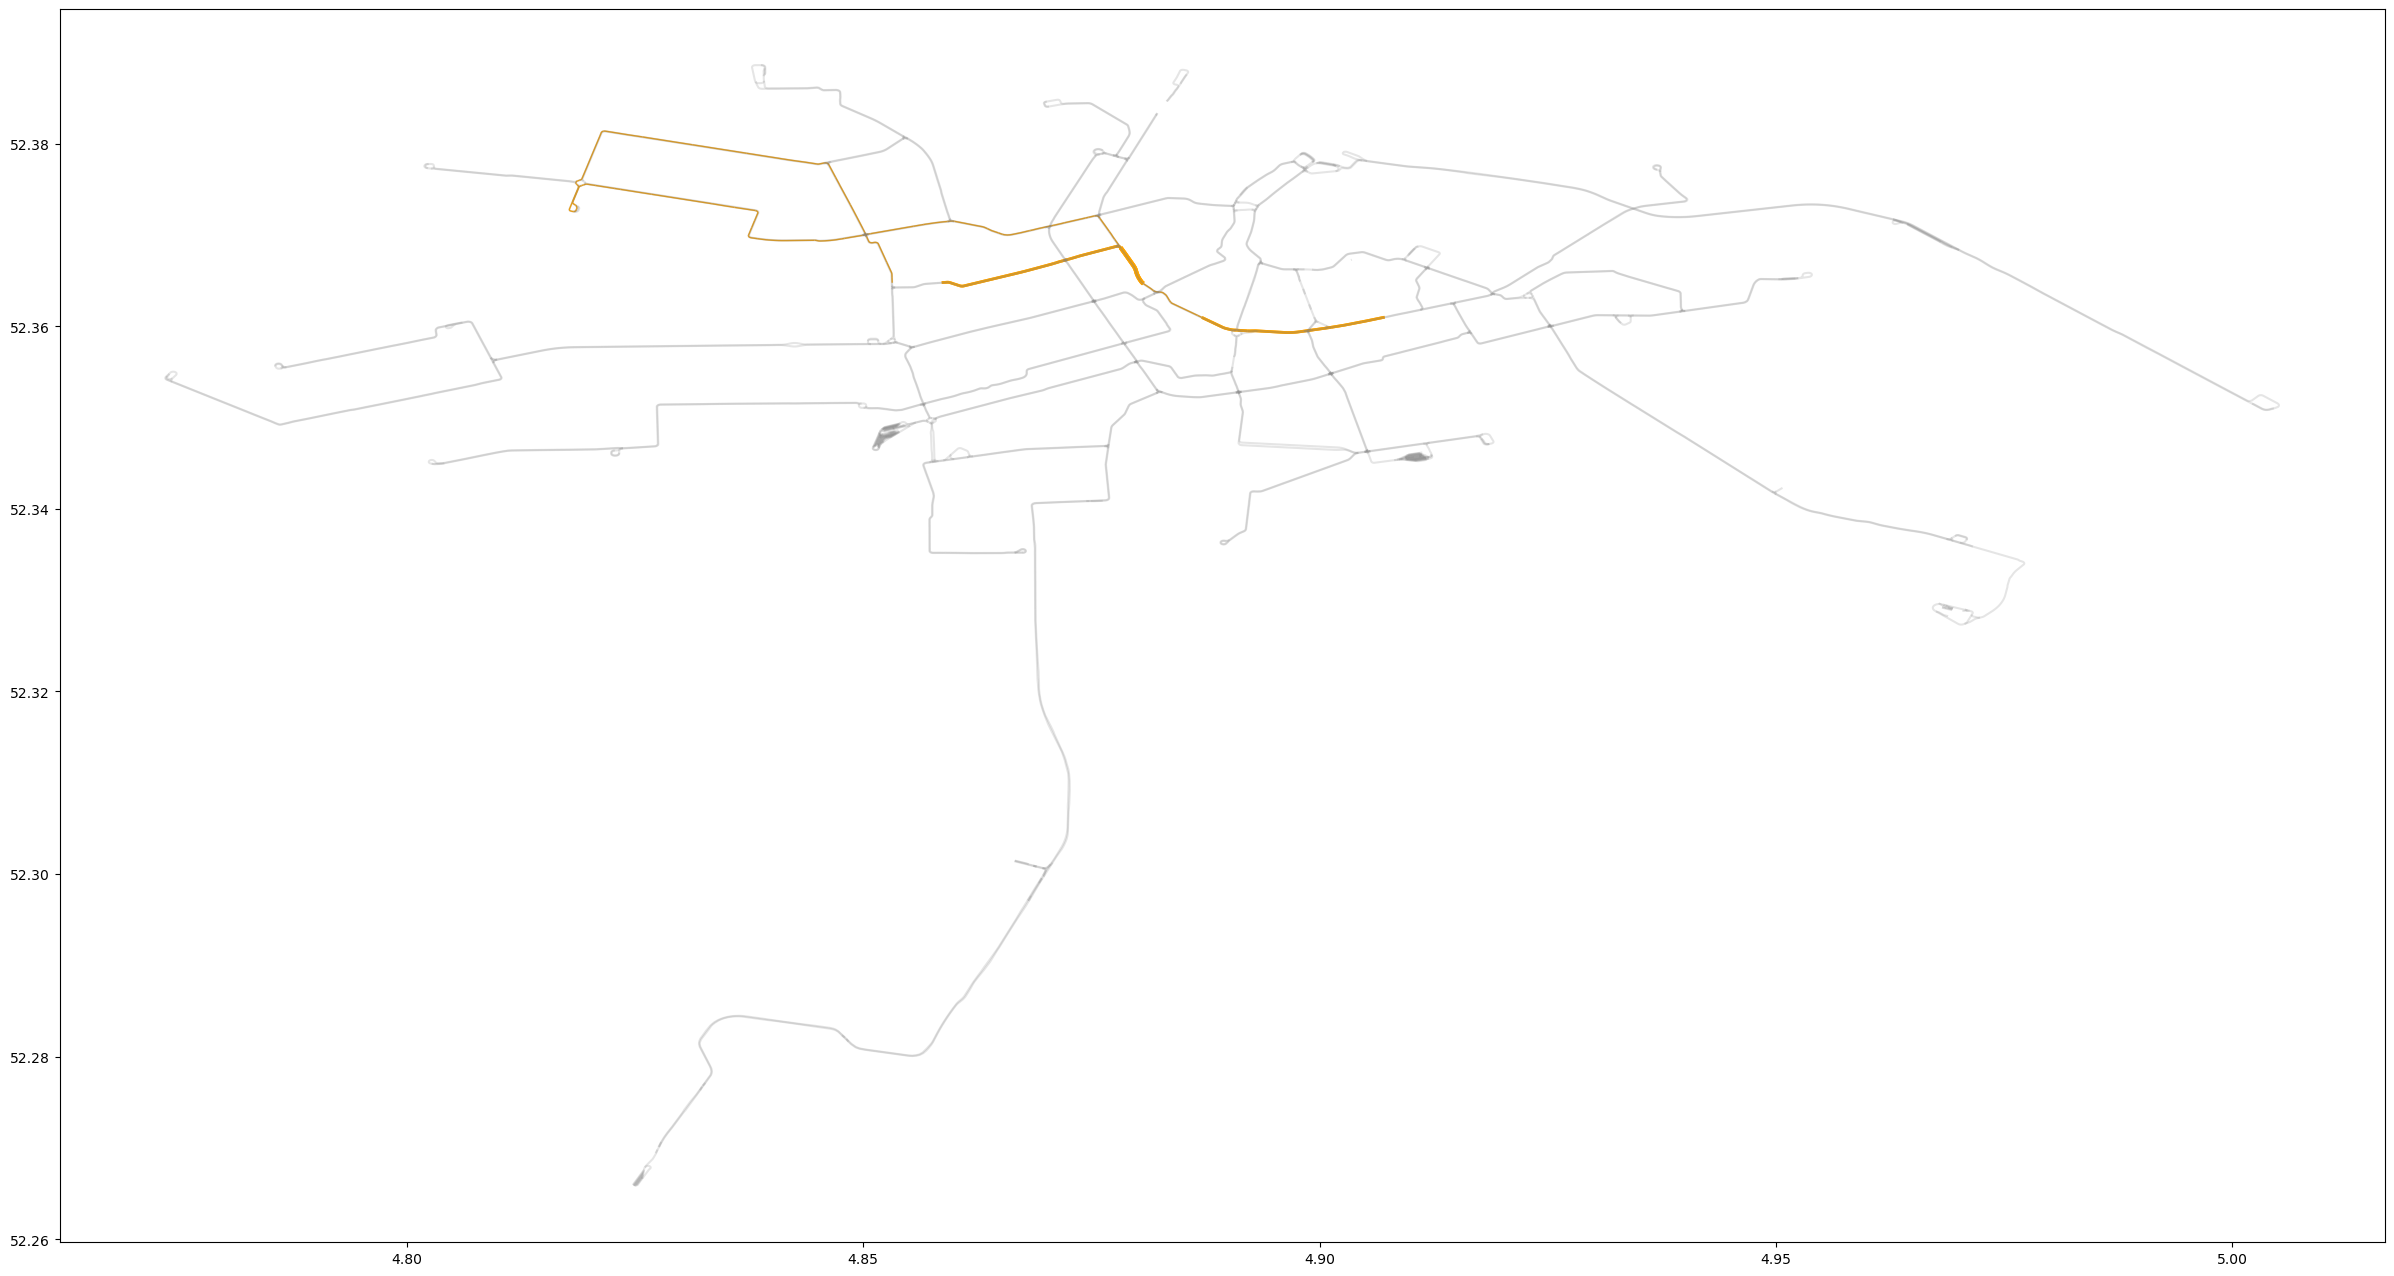

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 2: Amsterdam 2 -- s-no transfer, e-no transfer, s_e are on one same route --- line7 exists some questions

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.9384281402172885, 
    's_coordinates_y': 52.37679255333848, 
    'e_coordinates_x': 4.843049857621368, 
    'e_coordinates_y': 52.37836705094605
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
402,POINT (4.93735 52.37682),2,414,Azartplein,4.937347,52.376818,"(4.9373469, 52.3768181)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
389,POINT (4.84493 52.37778),2,1656,Bos en Lommerplein,4.844933,52.377782,"(4.8449335, 52.3777823)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on one same route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   7



,ref
0,7


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1   10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2   43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3   45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4   13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5   15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6   41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7   55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8   11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)  4.849979   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                       name                      geometry     geo_x  \
 28   2                 Azartplein  POINT (4.9373223 52.3766133)  4.937322   
 27   5        C. van Eesterenlaan  POINT (4.9388456 52.3735665)  4.938846   
 26  25               Rietlandpark   POINT (4.9344045 52.372921)  4.934405   
 25   3    Eerste Leeghwaterstraat  POINT (4.9293975 52.3700769)  4.929398   
 24  23      Eerste Coehoornstraat  POINT (4.9265233 52.3683184)  4.926523   
 23  24              Hoogte Kadijk  POINT (4.9242477 52.3666491)  4.924248   
 22   6             Alexanderplein  POINT (4.9192366 52.3638735)  4.919237   
 21   7  Korte 's-Gravesandestraat  POINT (4.9135923 52.3623479)  4.913592   
 20   4               Weesperplein  POINT (4.9071213 52.3610021)  4.907121   
 19  22             Frederiksplein  POINT (4.8978483 52.3594109)  4.897848   
 18   8               Vijzelgracht  POINT (4.8921024 52.3595051)  4.892102   
 17   0                Rijksmuseum   POINT (4.887104 52.3609734)

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1514  1599
 1   1599  1254
 2   1254  1580
 3   1580  1598
 4   1598  1801
 5   1801  1626
 6   1626  1710
 7   1710  1666
 8   1666  1700
 9   1700  1656
 10  1656  1833
 11  1833  1642
 12  1642  1889
 13  1889  1834
 14  1834  1534
 15  1534  1597
 16  1597  1809
 17  1809  1807
 18  1807  1575
 19  1575  1810
 20  1810  1596
 21  1596  1168]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1514  1599
 1   1599  1254
 2   1254  1580
 3   1580  1598
 4   1598  1801
 5   1801  1626
 6   1626  1710
 7   1710  1666
 8   1666  1700
 9   1700  1656
 10  1656  1833
 11  1833  1642
 12  1642  1889
 13  1889  1834
 14  1834  1534
 15  1534  1597
 16  1597  1809
 17  1809  1807
 18  1807  1575
 19  1575  1810
 20  1810  1596
 21  1596  1168]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
919,323311655,"LINESTRING (4.8881128 52.3604955, 4.8880585 52...",tram,None,919,890,1514,86.878758,0.006206,86,"(890, 1514)","(1514, 890)"
926,323311660,"LINESTRING (4.8881809 52.3604632, 4.8881128 52...",tram,None,926,898,890,5.867505,0.000419,5,"(898, 890)","(890, 898)"
1514,611860982,"LINESTRING (4.890876 52.3595816, 4.8907257 52....",tram,None,1514,313,898,212.356412,0.015168,212,"(313, 898)","(898, 313)"
1520,611884641,"LINESTRING (4.8921024 52.3595051, 4.8920271 52...",tram,None,1520,1599,349,75.793422,0.005414,75,"(1599, 349)","(349, 1599)"
1846,770413340,"LINESTRING (4.8909954 52.359574, 4.890876 52.3...",tram,None,1846,349,313,8.176527,0.000584,8,"(349, 313)","(313, 349)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1471,597894527,"LINESTRING (4.9334626 52.3725714, 4.9333945 52...",tram,None,1471,1019,1035,369.947405,0.026425,369,"(1019, 1035)","(1035, 1019)"
1147,329459455,"LINESTRING (4.9388456 52.3735665, 4.9387266 52...",tram,None,1147,1596,1810,312.085510,0.022292,312,"(1596, 1810)","(1810, 1596)"
951,323847232,"LINESTRING (4.938304 52.375572, 4.9385723 52.3...",tram,None,951,920,921,32.333932,0.002310,32,"(920, 921)","(921, 920)"
1146,329459455,"LINESTRING (4.9385723 52.3753322, 4.9393796 52...",tram,None,1146,921,1596,300.859501,0.021490,300,"(921, 1596)","(1596, 921)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,323311655,"LINESTRING (4.8881128 52.3604955, 4.8880585 52...",tram,None,919,890,1514,86.878758,0.006206,86,"(890, 1514)","(1514, 890)",3.0
1,323311660,"LINESTRING (4.8881809 52.3604632, 4.8881128 52...",tram,None,926,898,890,5.867505,0.000419,5,"(898, 890)","(890, 898)",3.0
2,611860982,"LINESTRING (4.890876 52.3595816, 4.8907257 52....",tram,None,1514,313,898,212.356412,0.015168,212,"(313, 898)","(898, 313)",3.0
3,611884641,"LINESTRING (4.8921024 52.3595051, 4.8920271 52...",tram,None,1520,1599,349,75.793422,0.005414,75,"(1599, 349)","(349, 1599)",3.0
4,770413340,"LINESTRING (4.8909954 52.359574, 4.890876 52.3...",tram,None,1846,349,313,8.176527,0.000584,8,"(349, 313)","(313, 349)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,597894527,"LINESTRING (4.9334626 52.3725714, 4.9333945 52...",tram,None,1471,1019,1035,369.947405,0.026425,369,"(1019, 1035)","(1035, 1019)",1.0
206,329459455,"LINESTRING (4.9388456 52.3735665, 4.9387266 52...",tram,None,1147,1596,1810,312.085510,0.022292,312,"(1596, 1810)","(1810, 1596)",1.0
207,323847232,"LINESTRING (4.938304 52.375572, 4.9385723 52.3...",tram,None,951,920,921,32.333932,0.002310,32,"(920, 921)","(921, 920)",1.0
208,329459455,"LINESTRING (4.9385723 52.3753322, 4.9393796 52...",tram,None,1146,921,1596,300.859501,0.021490,300,"(921, 1596)","(1596, 921)",1.0


In [39]:
shortest_path_edges_way.time.sum()

1.5132600880200742

<Axes: >

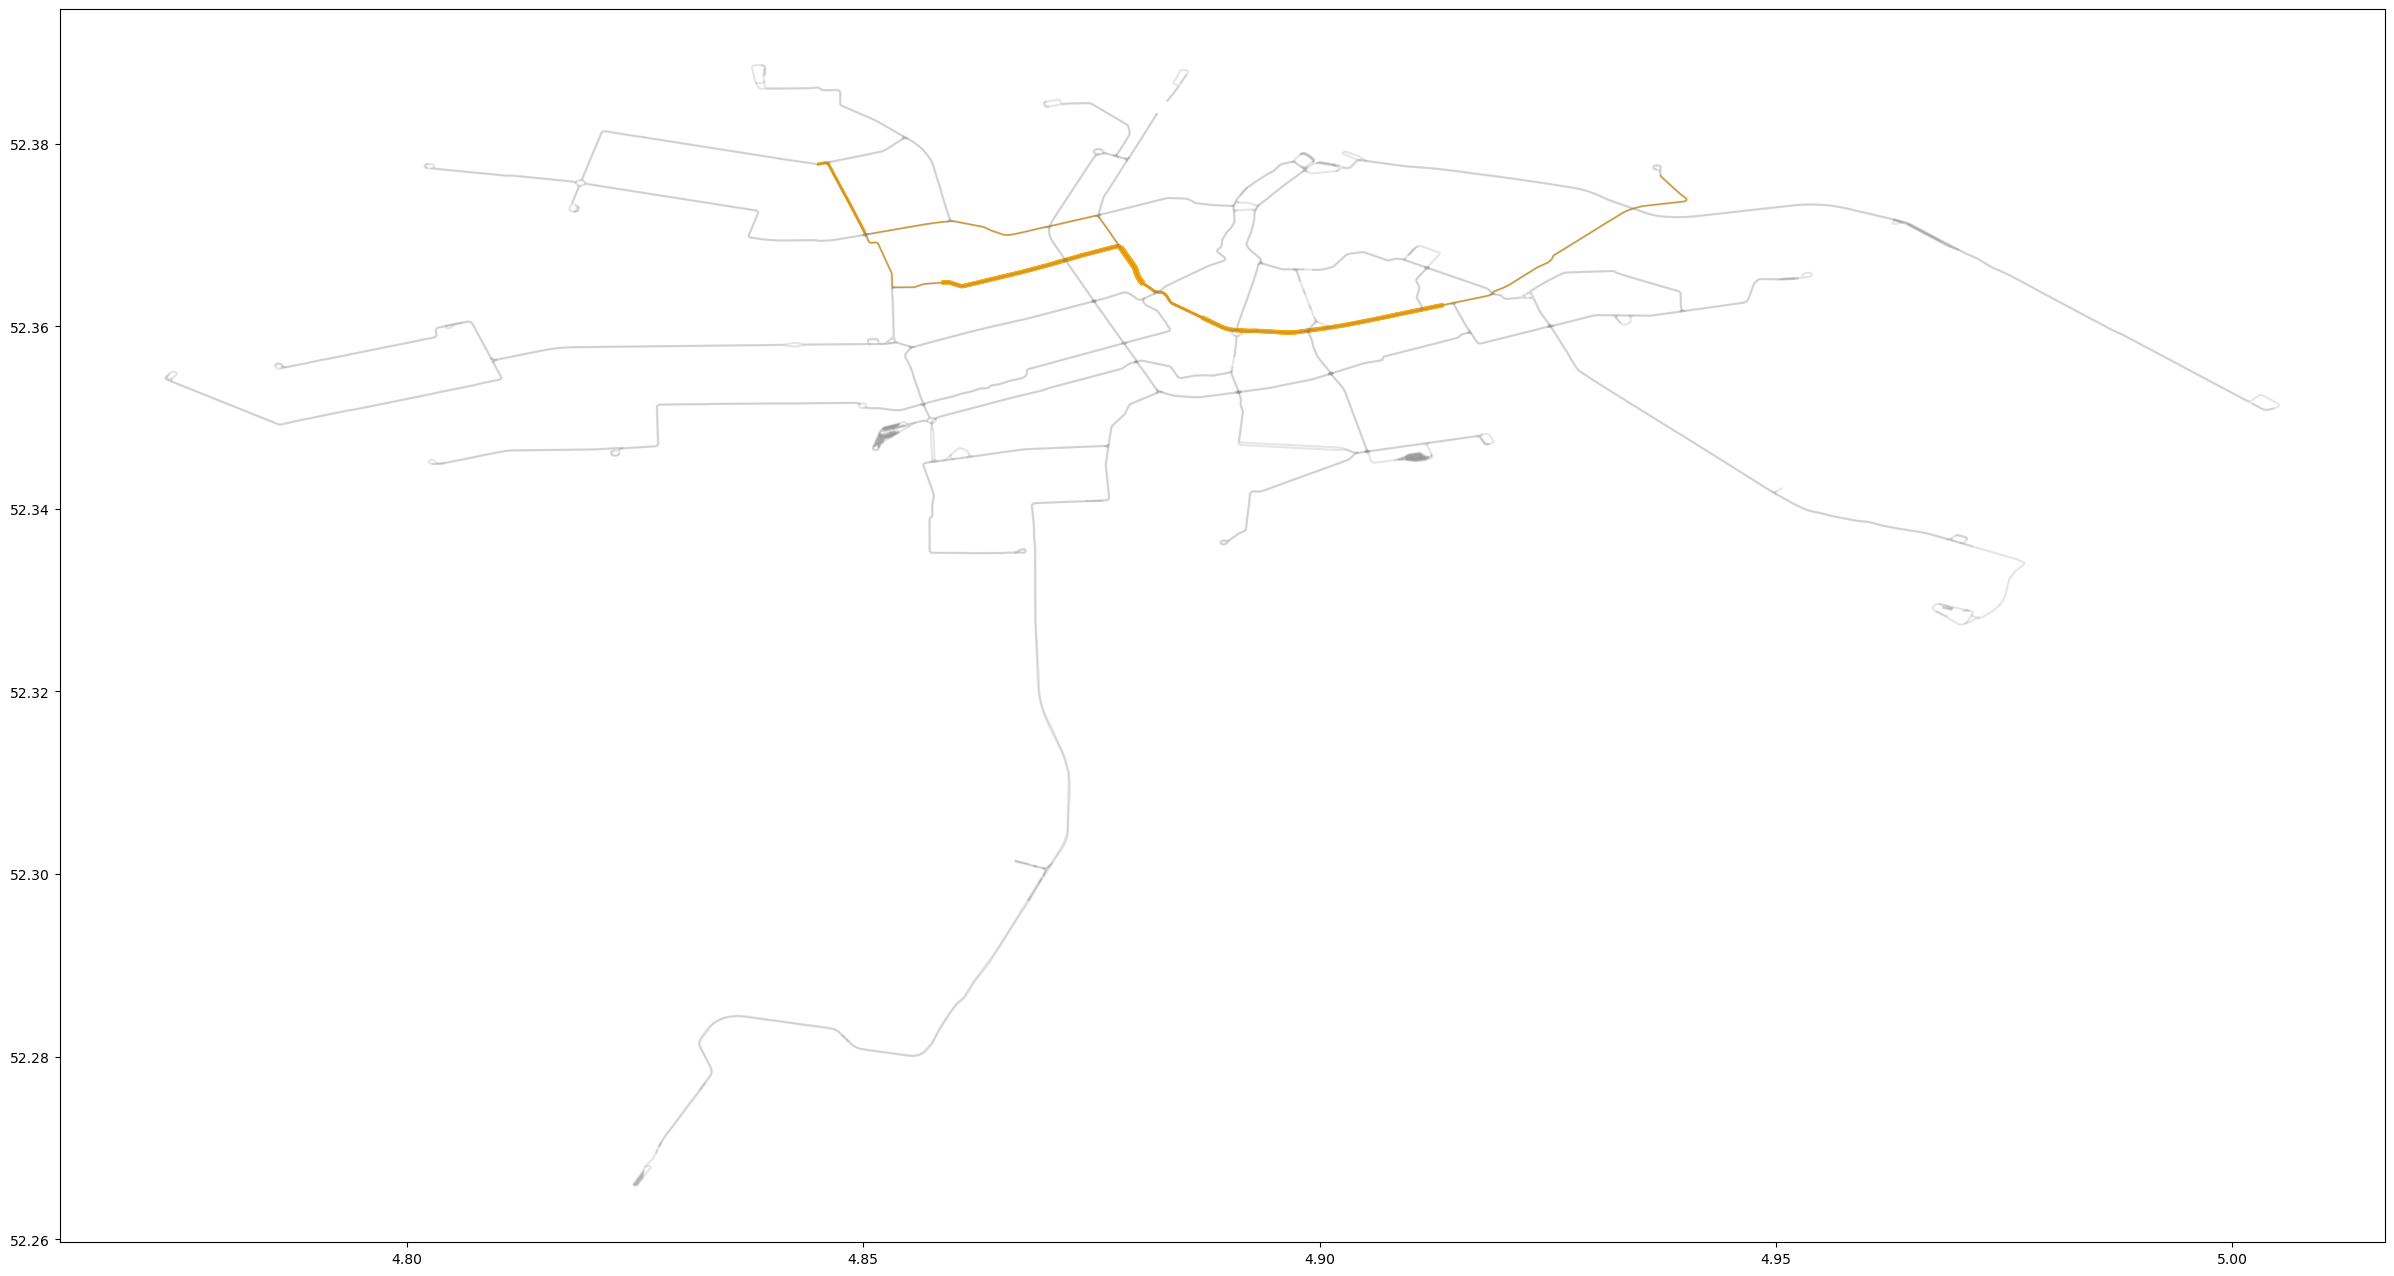

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 1: Amsterdam 1 -- s-no transfer, e-transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.816941988672407, 
    's_coordinates_y': 52.36594888564495, 
    'e_coordinates_x': 4.850845096317399, 
    'e_coordinates_y': 52.3751369796771
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
383,POINT (4.81860 52.37284),2,222,Sloterpark,4.818602,52.372845,"(4.8186019, 52.3728449)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
391,POINT (4.84859 52.37333),2,1642,Jan van Galenstraat,4.848589,52.373332,"(4.8485891, 52.3733319)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"13, 19, 7","13, 19, 7"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of e_on_route is the same as s_on_route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   7



,ref
0,7


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1   10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2   43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3   45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4   13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5   15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6   41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7   55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8   11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)  4.849979   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[   id                       name                      geometry     geo_x  \
 0  47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1  10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2  43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3  45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4  13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5  15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6  41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7  55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8  11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 
        geo_y                                    route_name_list ref route  \
 0  52.372845  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   7  tram   
 1  52.375067  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   7  tr

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0   222  1641
 1  1641  1660
 2  1660  1665
 3  1665  1658
 4  1658  1661
 5  1661  1656
 6  1656  1833
 7  1833  1642]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0   222  1641
 1  1641  1660
 2  1660  1665
 3  1665  1658
 4  1658  1661
 5  1661  1656
 6  1656  1833
 7  1833  1642]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
496,144719687,"LINESTRING (4.8182425 52.3725701, 4.8183616 52...",tram,None,496,218,222,43.890304,0.003135,43,"(218, 222)","(222, 218)"
1098,326923964,"LINESTRING (4.8187509 52.3750672, 4.8183147 52...",tram,None,1098,1641,218,303.034667,0.021645,303,"(1641, 218)","(218, 1641)"
260,27124074,"LINESTRING (4.818684 52.3759149, 4.8186147 52....",tram,None,260,307,308,36.087729,0.002578,36,"(307, 308)","(308, 307)"
261,27124075,"LINESTRING (4.8185658 52.3756232, 4.8186212 52...",tram,None,261,308,309,16.673519,0.001191,16,"(308, 309)","(309, 308)"
264,27124078,"LINESTRING (4.818899 52.375991, 4.8187964 52.3...",tram,None,264,306,307,16.912756,0.001208,16,"(306, 307)","(307, 306)"
1041,324264744,"LINESTRING (4.8211591 52.3808373, 4.8206528 52...",tram,None,1041,1660,306,565.292290,0.040378,565,"(1660, 306)","(306, 1660)"
1097,326923964,"LINESTRING (4.8186918 52.3754947, 4.8187184 52...",tram,None,1097,309,1641,49.918247,0.003566,49,"(309, 1641)","(1641, 309)"
905,323258166,"LINESTRING (4.8258104 52.38075, 4.8243313 52.3...",tram,None,905,1665,886,300.529728,0.021466,300,"(1665, 886)","(886, 1665)"
1040,324264744,"LINESTRING (4.8215284 52.3813703, 4.8214937 52...",tram,None,1040,886,1660,66.777683,0.004770,66,"(886, 1660)","(1660, 886)"
904,323258166,"LINESTRING (4.8312794 52.3798913, 4.8271043 52...",tram,None,904,1658,1665,384.391344,0.027457,384,"(1658, 1665)","(1665, 1658)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,144719687,"LINESTRING (4.8182425 52.3725701, 4.8183616 52...",tram,None,496,218,222,43.890304,0.003135,43,"(218, 222)","(222, 218)",1.0
1,326923964,"LINESTRING (4.8187509 52.3750672, 4.8183147 52...",tram,None,1098,1641,218,303.034667,0.021645,303,"(1641, 218)","(218, 1641)",1.0
2,27124074,"LINESTRING (4.818684 52.3759149, 4.8186147 52....",tram,None,260,307,308,36.087729,0.002578,36,"(307, 308)","(308, 307)",1.0
3,27124075,"LINESTRING (4.8185658 52.3756232, 4.8186212 52...",tram,None,261,308,309,16.673519,0.001191,16,"(308, 309)","(309, 308)",1.0
4,27124078,"LINESTRING (4.818899 52.375991, 4.8187964 52.3...",tram,None,264,306,307,16.912756,0.001208,16,"(306, 307)","(307, 306)",1.0
5,324264744,"LINESTRING (4.8211591 52.3808373, 4.8206528 52...",tram,None,1041,1660,306,565.292290,0.040378,565,"(1660, 306)","(306, 1660)",1.0
6,326923964,"LINESTRING (4.8186918 52.3754947, 4.8187184 52...",tram,None,1097,309,1641,49.918247,0.003566,49,"(309, 1641)","(1641, 309)",1.0
7,323258166,"LINESTRING (4.8258104 52.38075, 4.8243313 52.3...",tram,None,905,1665,886,300.529728,0.021466,300,"(1665, 886)","(886, 1665)",1.0
8,324264744,"LINESTRING (4.8215284 52.3813703, 4.8214937 52...",tram,None,1040,886,1660,66.777683,0.004770,66,"(886, 1660)","(1660, 886)",1.0
9,323258166,"LINESTRING (4.8312794 52.3798913, 4.8271043 52...",tram,None,904,1658,1665,384.391344,0.027457,384,"(1658, 1665)","(1665, 1658)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.23977664379048358

<Axes: >

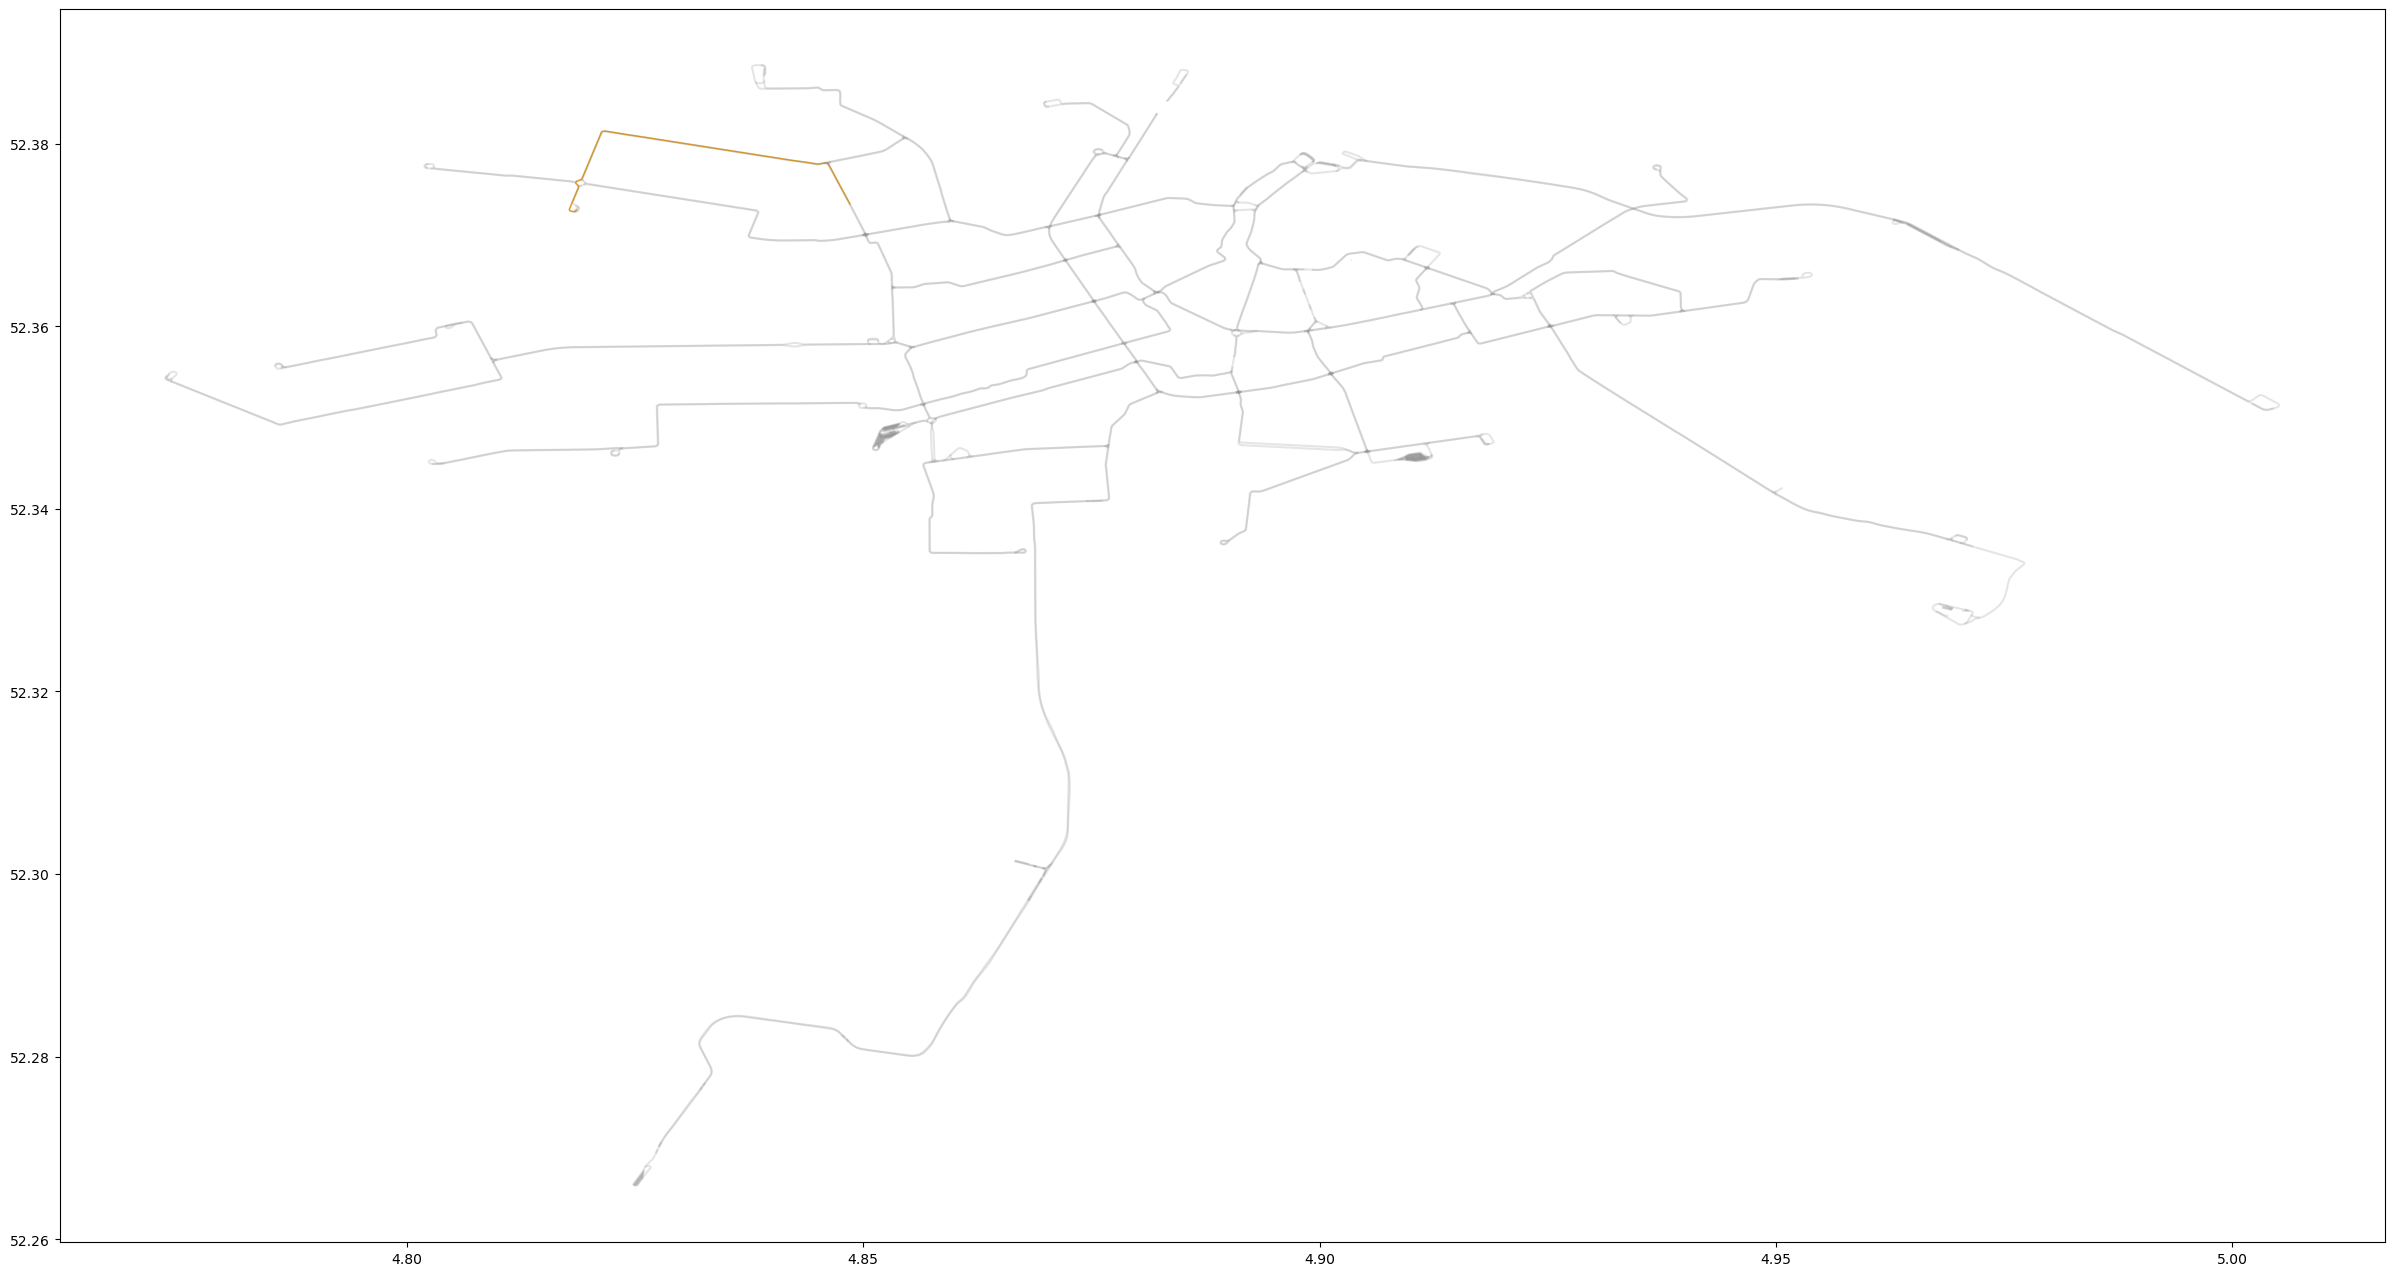

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')